# Solar forecast

## Load necessary packages and pre-define functions

In [1]:
#!pip install pandas
#!pip install matplotlib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(np.__version__)

1.26.4


In [5]:
#pip install requests
import requests
import json
import pytz
from datetime import datetime, timedelta
import calendar

In [6]:
SOLAR_PATH = 'solar_forecast'
SOLAR_PATH = ''

In [7]:
pwd

'C:\\Users\\Gebruiker\\Documents\\solar_forecast'

In [8]:
# load csv
def load_solar_data(csvname, solar_path=SOLAR_PATH, sep=","):
        csv_path = os.path.join(solar_path, csvname)
        return pd.read_csv(csv_path, sep=sep)

## Load solar data

In [9]:
solgain_raw=load_solar_data('vermogen_n2.csv', sep=';')

In [10]:
solgain_raw.head(40)

Unnamed: 0                         time  value
0            0  2024-07-29T00:08:08.530350Z    0.0
1            1  2024-07-29T00:48:08.529554Z    0.0
2            2  2024-07-29T01:18:08.548285Z    0.0
3            3  2024-07-29T01:48:08.522938Z    0.0
4            4  2024-07-29T02:48:08.621637Z    0.0
5            5  2024-07-29T03:08:08.542047Z    0.3
6            6  2024-07-29T03:38:39.917186Z    0.1
7            7  2024-07-29T03:48:08.560356Z    0.3
8            8  2024-07-29T04:08:08.546396Z    1.6
9            9  2024-07-29T04:48:08.519784Z    1.6
10          10  2024-07-29T04:57:20.172463Z    0.2
11          11  2024-07-29T05:04:40.150531Z    0.3
12          12  2024-07-29T05:08:08.529886Z    2.3
13          13  2024-07-29T05:08:40.133981Z    0.4
14          14  2024-07-29T05:12:20.150570Z    0.5
15          15  2024-07-29T05:16:00.160581Z    0.6
16          16  2024-07-29T05:19:20.131351Z    0.7
17          17  2024-07-29T05:22:20.129897Z    0.8
18          18  2024-07-29T05:25:40.251629Z    0.9
19          19  2024-07-29T05:28:40.130006Z    1.0
20          20  2024-07-29T05:31:20.232623Z    1.1
21          21  2024-07-29T05:34:20.148444Z    1.2
22          22  2024-07-29T05:37:00.232272Z    1.3
23          23  2024-07-29T05:39:40.248034Z    1.4
24          24  2024-07-29T05:42:20.239233Z    1.5
25          25  2024-07-29T05:45:00.234330Z    1.6
26          26  2024-07-29T05:47:21.033371Z    1.7
27          27  2024-07-29T05:50:00.245197Z    1.8
28          28  2024-07-29T05:52:20.239819Z    1.9
29          29  2024-07-29T05:54:40.241355Z    2.0
30          30  2024-07-29T05:57:20.238049Z    2.1
31          31  2024-07-29T05:58:08.572291Z    2.2
32          32  2024-07-29T05:59:40.254880Z    2.2
33          33  2024-07-29T06:01:40.256225Z    2.3
34          34  2024-07-29T06:04:00.337722Z    2.4
35          35  2024-07-29T06:06:20.337531Z    2.5
36          36  2024-07-29T06:08:08.563469Z    2.8
37          37  2024-07-29T06:08:40.351166Z    2.6
38          38  2024-07-29T06:11:00.340076Z    2.7
39          39  2024-07-29T06:13:00.364081Z    2.8

In [11]:
solgain_raw.describe()

Unnamed: 0         value
count  84342.000000  84342.000000
mean   42170.500000     12.505820
std    24347.582539     11.269096
min        0.000000      0.000000
25%    21085.250000      2.500000
50%    42170.500000      9.800000
75%    63255.750000     20.100000
max    84341.000000     48.100000

In [12]:
solgain_raw.size

253026

## Preprocess the data

### Mean values per hour (to the next hour)

In [13]:
solgain_raw['time'] = pd.to_datetime(solgain_raw['time']) #, format='%d%b%Y:%H:%M:%S.%f'

In [14]:
solgain_raw['time']

0       2024-07-29 00:08:08.530350+00:00
1       2024-07-29 00:48:08.529554+00:00
2       2024-07-29 01:18:08.548285+00:00
3       2024-07-29 01:48:08.522938+00:00
4       2024-07-29 02:48:08.621637+00:00
                      ...               
84337   2025-07-31 21:13:35.780826+00:00
84338   2025-07-31 21:22:25.140885+00:00
84339   2025-07-31 21:33:35.585447+00:00
84340   2025-07-31 22:03:35.589347+00:00
84341   2025-07-31 23:13:35.585117+00:00
Name: time, Length: 84342, dtype: datetime64[ns, UTC]

In [15]:
solgain_agg_raw=solgain_raw.groupby((solgain_raw.time.dt.year-2024)*(365 + calendar.isleap(datetime.now().year-1))*24+solgain_raw.time.dt.day_of_year*24+solgain_raw.time.dt.hour)[['value']].max()

In [16]:
solgain_agg_raw.head(20)

value
time       
5064    0.0
5065    0.0
5066    0.0
5067    0.3
5068    1.6
5069    2.3
5070    5.1
5071    8.3
5072   11.7
5073   15.3
5074   19.5
5075   23.8
5076   27.9
5077   31.6
5078   35.0
5079   38.3
5080   41.3
5081   43.5
5082   44.6
5083    0.0

### remove NaNs

In [17]:
solgain_agg_raw.dropna(inplace=True)

### remove inconsistent jumps from solar opbrengst

In [18]:
jump=solgain_agg_raw.diff()
jump.dropna(inplace=True)
jump.drop(jump.index[jump.value>=0], inplace=True)
jump

value
time        
5083   -44.6
5108   -41.5
5131   -22.1
5143    -0.9
5155   -15.2
...      ...
13819  -28.4
13843  -25.1
13845  -25.2
13868  -38.1
13891  -17.0

[496 rows x 1 columns]

In [19]:
solgain_agg_fix=solgain_agg_raw
for indexer in jump.index:
    print('Index : ', indexer)
    print('Value : ', jump.loc[indexer].value)
    solgain_agg_fix[solgain_agg_fix.index>=indexer]=solgain_agg_fix[solgain_agg_fix.index>=indexer]-jump.loc[indexer].value

Index :  5083
Value :  -44.6
Index :  5108
Value :  -41.5
Index :  5131
Value :  -22.1
Index :  5143
Value :  -0.9
Index :  5155
Value :  -15.2
Index :  5179
Value :  -28.1
Index :  5189
Value :  -0.10000000000000009
Index :  5203
Value :  -21.4
Index :  5227
Value :  -22.0
Index :  5252
Value :  -40.1
Index :  5275
Value :  -39.7
Index :  5284
Value :  -0.09999999999999998
Index :  5299
Value :  -19.0
Index :  5324
Value :  -31.9
Index :  5348
Value :  -20.6
Index :  5371
Value :  -34.3
Index :  5396
Value :  -41.1
Index :  5419
Value :  -39.0
Index :  5443
Value :  -34.8
Index :  5445
Value :  -34.8
Index :  5467
Value :  -14.9
Index :  5491
Value :  -34.7
Index :  5514
Value :  -11.3
Index :  5539
Value :  -27.1
Index :  5563
Value :  -25.4
Index :  5587
Value :  -33.0
Index :  5609
Value :  -22.2
Index :  5611
Value :  -22.5
Index :  5635
Value :  -32.2
Index :  5658
Value :  -29.2
Index :  5670
Value :  -0.09999999999999987
Index :  5682
Value :  -17.9
Index :  5693
Value :  -0.09

In [20]:
solgain_agg_fix.head(30)

value
time       
5064    0.0
5065    0.0
5066    0.0
5067    0.3
5068    1.6
5069    2.3
5070    5.1
5071    8.3
5072   11.7
5073   15.3
5074   19.5
5075   23.8
5076   27.9
5077   31.6
5078   35.0
5079   38.3
5080   41.3
5081   43.5
5082   44.6
5083   44.6
5084   44.6
5085   44.6
5086   44.6
5087   44.6
5088   44.6
5089   44.6
5090   44.6
5091   45.0
5092   46.3
5093   46.8

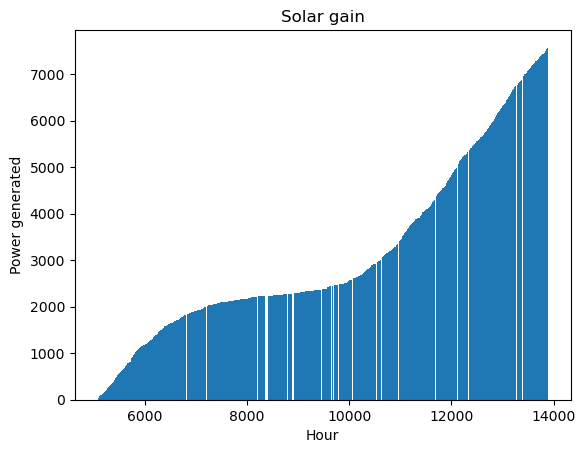

In [21]:
plt.bar(solgain_agg_fix.index.values,solgain_agg_fix.value.values, width=1)
plt.xlabel("Hour")
plt.ylabel("Power generated")
plt.title("Solar gain")
plt.show()

### map to 24h and fill in blanks

In [22]:
mindex=solgain_agg_fix.index.min()

In [23]:
maxdex=solgain_agg_fix.index.max()

In [24]:
def map_df_24h(df_in, mindex=1, maxdex=24):
    df_int=pd.DataFrame(index=range(mindex,maxdex+1), columns=df_in.columns)
    for indexer in range(mindex, maxdex+1):
        ind_sel=max(df_in.index.values[df_in.index.values<=indexer])
        for name in list(df_in.columns): #df_in[df_in.index.values==ind_sel].mean().iteritems():
            #print(name)
            values=df_in[name].iloc[df_in.index.values==ind_sel].max()
            df_int[name].loc[[indexer]]=values
    return df_int

In [25]:
solgain_agg_fix_int=map_df_24h(solgain_agg_fix, mindex,maxdex)

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_20476\1538351413.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_int[name].loc[[indexer]]=values
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_20476\1538351413.py:8: FutureWarning: Cha

In [26]:
solgain_agg_fix_int.iloc[0:20]

value
5064   0.0
5065   0.0
5066   0.0
5067   0.3
5068   1.6
5069   2.3
5070   5.1
5071   8.3
5072  11.7
5073  15.3
5074  19.5
5075  23.8
5076  27.9
5077  31.6
5078  35.0
5079  38.3
5080  41.3
5081  43.5
5082  44.6
5083  44.6

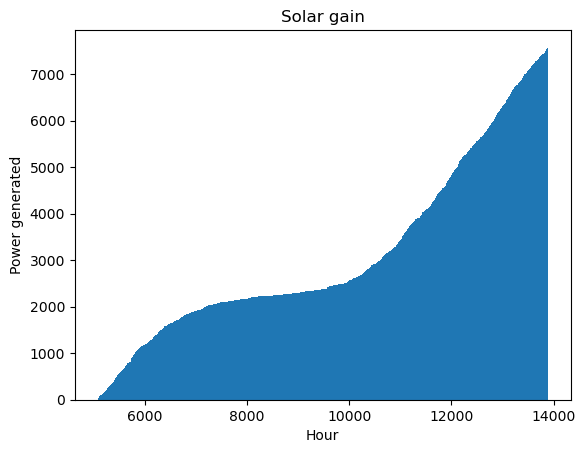

In [27]:
plt.bar(solgain_agg_fix_int.index.values,solgain_agg_fix_int.value.values, width=1)
plt.xlabel("Hour")
plt.ylabel("Power generated")
plt.title("Solar gain")
plt.show()

### differential for solar power

In [28]:
solgain_agg_fix_int_dv=solgain_agg_fix_int.diff()

In [29]:
solgain_agg_fix_int_dv.head(20)

value
5064   NaN
5065   0.0
5066   0.0
5067   0.3
5068   1.3
5069   0.7
5070   2.8
5071   3.2
5072   3.4
5073   3.6
5074   4.2
5075   4.3
5076   4.1
5077   3.7
5078   3.4
5079   3.3
5080   3.0
5081   2.2
5082   1.1
5083   0.0

In [30]:
solgain_agg_fix_int_dv.value
solgain_agg_fix_int_dv.drop(mindex, inplace=True)

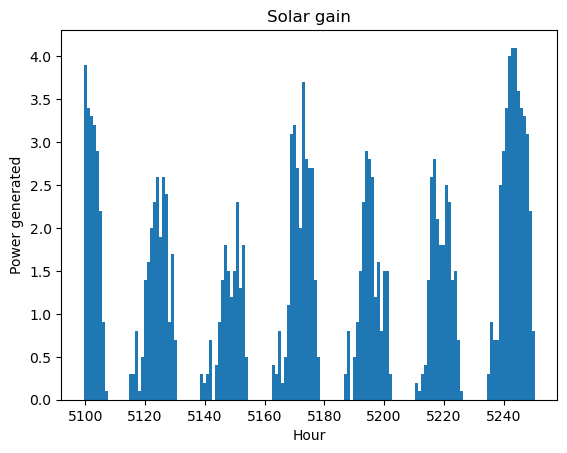

In [31]:
plt.bar(solgain_agg_fix_int_dv.loc[5100:5250].index.values,solgain_agg_fix_int_dv.loc[5100:5250].value.values, width=1)
plt.xlabel("Hour")
plt.ylabel("Power generated")
plt.title("Solar gain")
plt.show()

Solar gain is expected for the current hour (e.g for hour 8 it is what is expected to be produced between 8 and 8:59). Nota bene: Timezone is UTC!

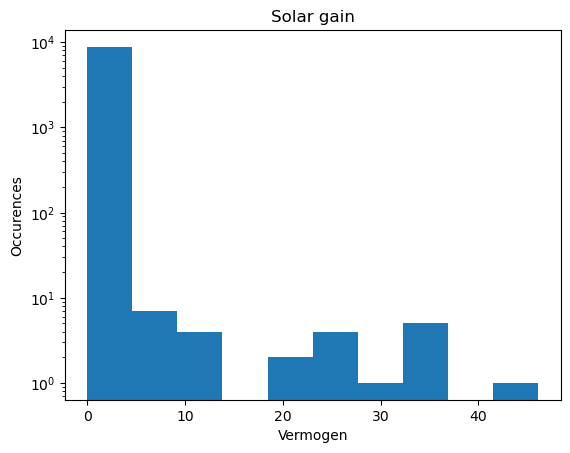

In [32]:
plt.hist(solgain_agg_fix_int_dv.value.values, log=True)
plt.xlabel("Vermogen")
plt.ylabel("Occurences")
plt.title("Solar gain")
plt.show()

In [33]:
solgain_agg_fix_int_dv[solgain_agg_fix_int_dv.value.values>4.5]

value
5444   34.8
5610   22.3
5731   33.3
5755   29.1
6164   22.1
6258   12.1
6593    4.9
6808    5.3
8056    6.2
9040    5.4
9571   12.9
10027   6.7
10052  11.9
10241   8.7
10530  10.4
10916  26.7
11036  33.9
11420  35.6
12140  46.1
12307  26.6
12356  24.1
12611   4.9
12706   4.5
13076  34.8
13844  25.2

In [34]:
solgain_agg_fix_int_dv.loc[5440:5450]

value
5440   1.9
5441   0.6
5442   0.2
5443   0.0
5444  34.8
5445   0.0
5446   0.0
5447   0.0
5448   0.0
5449   0.0
5450   0.0

In [35]:
np.sort(solgain_agg_fix_int_dv.value.values)[::-1]

array([46.100000000000364, 35.59999999999991, 34.80000000000018, ...,
       -4.547473508864641e-13, -4.547473508864641e-13,
       -9.094947017729282e-13], dtype=object)

In [36]:
solgain_agg_fix_int_dv=solgain_agg_fix_int_dv[solgain_agg_fix_int_dv.value.values<=4.5] #physically not possible to have more than 4.5 kWh

In [37]:
solgain_agg_fix_int.size

8832

### Get historical weather data

In [38]:
# first half of the roof
parameters_1 = {
    "latitude": 51.3225,
    "longitude": 4.9447,
    "start_date": '2024-07-29',
    "end_date": '2025-08-01',
    "tilt": 60,
    "azimuth": 77,
    "hourly": ['relative_humidity_2m', 'precipitation', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high' , 'soil_temperature_0_to_7cm', 'snow_depth', 'global_tilted_irradiance'],
}

In [39]:
# other half of the roof
parameters_2 = {
    "latitude": 51.3225,
    "longitude": 4.9447,
    "start_date": '2024-07-29',
    "end_date": '2025-08-01',
    "tilt": 60,
    "azimuth": -103,
    "hourly": ['global_tilted_irradiance'],
}

In [40]:
response = requests.get("https://archive-api.open-meteo.com/v1/archive",params=parameters_1)
weather_agg_int=pd.DataFrame(response.json()['hourly'])
response = requests.get("https://archive-api.open-meteo.com/v1/archive",params=parameters_2)
sndhalf=pd.DataFrame(response.json()['hourly'])

In [41]:
# combine (add up since same number of solar panels on each half)
weather_agg_int.global_tilted_irradiance=weather_agg_int.global_tilted_irradiance+sndhalf.global_tilted_irradiance

In [42]:
weather_agg_int['is_day']=weather_agg_int.global_tilted_irradiance>0

In [43]:
weather_agg_int

time  relative_humidity_2m  precipitation  cloud_cover_low  \
0     2024-07-29T00:00                    81            0.0                0   
1     2024-07-29T01:00                    84            0.0                0   
2     2024-07-29T02:00                    86            0.0                0   
3     2024-07-29T03:00                    89            0.0                0   
4     2024-07-29T04:00                    92            0.0                0   
...                ...                   ...            ...              ...   
8851  2025-08-01T19:00                    80            0.0               27   
8852  2025-08-01T20:00                    84            0.0                9   
8853  2025-08-01T21:00                    89            0.0                7   
8854  2025-08-01T22:00                    92            0.0                2   
8855  2025-08-01T23:00                    93            0.0                2   

      cloud_cover_mid  cloud_cover_high  soil_temperature_0_to_7cm  \
0                   0                 2                       17.1   
1                   0                58                       16.8   
2                   0                18                       16.4   
3                   0                 5                       16.0   
4                   0                 0                       15.7   
...               ...               ...                        ...   
8851                7                 0                       17.5   
8852                5                 0                       16.7   
8853                7                 0                       16.1   
8854                7                 9                       15.5   
8855                6                58                       15.0   

      snow_depth  global_tilted_irradiance  is_day  
0            0.0                       0.0   False  
1            0.0                       0.0   False  
2            0.0                       0.0   False  
3            0.0                       0.0   False  
4            0.0                       0.0   False  
...          ...                       ...     ...  
8851         0.0                     248.5    True  
8852         0.0                      14.8    True  
8853         0.0                       0.0   False  
8854         0.0                       0.0   False  
8855         0.0                       0.0   False  

[8856 rows x 10 columns]

In [44]:
weather_agg_int.size/8

11070.0

In [45]:
solgain_agg_fix_int_dv.size

8806

In [46]:
# date time and merge
weather_agg_int['time_']=weather_agg_int['time']
weather_agg_int['time'] = pd.to_datetime(weather_agg_int['time'])
weather_agg_int['time']=(weather_agg_int.time.dt.year-2024)*(365 + calendar.isleap(datetime.now().year-1))*24+weather_agg_int.time.dt.day_of_year*24+weather_agg_int.time.dt.hour
weather_agg_int.set_index('time', inplace=True)

In [47]:
weather_agg_int.index.unique()

Index([ 5064,  5065,  5066,  5067,  5068,  5069,  5070,  5071,  5072,  5073,
       ...
       13910, 13911, 13912, 13913, 13914, 13915, 13916, 13917, 13918, 13919],
      dtype='int32', name='time', length=8856)

In [48]:
solgain_agg_fix_int_dv.index

Index([ 5065,  5066,  5067,  5068,  5069,  5070,  5071,  5072,  5073,  5074,
       ...
       13886, 13887, 13888, 13889, 13890, 13891, 13892, 13893, 13894, 13895],
      dtype='int64', length=8806)

In [49]:
# make 2 versions at begin and end of interval
weather_agg_int_1=weather_agg_int.loc[solgain_agg_fix_int_dv.index]
weather_agg_int_2=weather_agg_int.loc[solgain_agg_fix_int_dv.index+1]
weather_agg_int_2.index=weather_agg_int_1.index

In [50]:
weather_agg_int_1.size/8

11007.5

In [51]:
solgain_agg_fix_int_dv.index

Index([ 5065,  5066,  5067,  5068,  5069,  5070,  5071,  5072,  5073,  5074,
       ...
       13886, 13887, 13888, 13889, 13890, 13891, 13892, 13893, 13894, 13895],
      dtype='int64', length=8806)

In [52]:
# precipitation and irradiation is preceeding hour, others are instant --> average over interval
weather_agg_int=weather_agg_int_2
weather_agg_int.time_=weather_agg_int_1.time_
weather_agg_int.relative_humidity_2m=(weather_agg_int_1.relative_humidity_2m+weather_agg_int_2.relative_humidity_2m)/2
weather_agg_int.cloud_cover_low=(weather_agg_int_1.cloud_cover_low+weather_agg_int_2.cloud_cover_low)/2
weather_agg_int.cloud_cover_mid=(weather_agg_int_1.cloud_cover_mid+weather_agg_int_2.cloud_cover_mid)/2
weather_agg_int.cloud_cover_high=(weather_agg_int_1.cloud_cover_high+weather_agg_int_2.cloud_cover_high)/2
weather_agg_int.soil_temperature_0_to_7cm=(weather_agg_int_1.soil_temperature_0_to_7cm+weather_agg_int_2.soil_temperature_0_to_7cm)/2
weather_agg_int.snow_depth=(weather_agg_int_1.snow_depth+weather_agg_int_2.snow_depth)/2

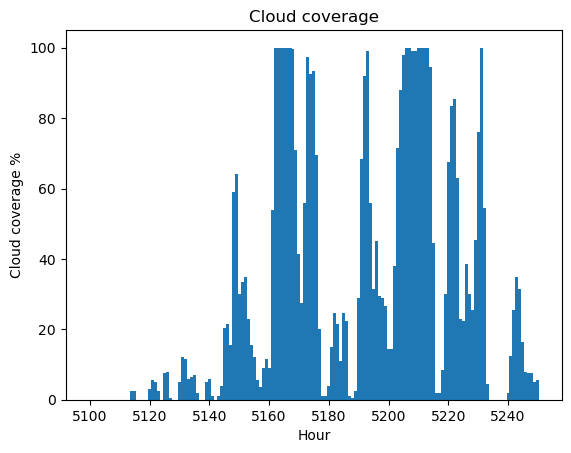

In [53]:
plt.bar(weather_agg_int.loc[5100:5250].index.values,weather_agg_int.loc[5100:5250].cloud_cover_low.values, width=1)
plt.xlabel("Hour")
plt.ylabel("Cloud coverage %")
plt.title("Cloud coverage")
plt.show()

In [54]:
# eliminate NaNs and negative snow depths
weather_agg_int.snow_depth[weather_agg_int.snow_depth<0]=0
weather_agg_int.snow_depth[np.isnan(weather_agg_int.snow_depth)]=0

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_20476\3498296554.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  weather_agg_int.snow_depth[weather_agg_int.snow_depth<0]=0
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_20476\3498296554.

In [55]:
weather_agg_int.snow_depth[np.isnan(weather_agg_int.snow_depth)]
sum(np.isnan(weather_agg_int.snow_depth))

0

In [56]:
weather_agg_int.tail(50)

relative_humidity_2m  precipitation  cloud_cover_low  cloud_cover_mid  \
13846                  82.5            0.0             20.0             19.0   
13847                  85.0            0.0             25.0             64.5   
13848                  86.0            0.0             24.5             96.5   
13849                  87.0            0.0             15.5             96.5   
13850                  88.0            0.0              8.0             77.5   
13851                  89.0            0.0             17.5             41.0   
13852                  89.0            0.0             37.0             20.5   
13853                  87.0            0.0             37.5             12.5   
13854                  83.0            0.1             25.5             15.5   
13855                  77.5            0.2             37.5             17.5   
13856                  73.5            0.5             43.0             16.0   
13857                  70.5            0.5             26.5             18.5   
13858                  64.5            0.2             16.5             15.0   
13859                  58.5            0.0             10.5              7.0   
13860                  56.5            0.0             11.0              4.0   
13861                  55.5            0.0             13.0              2.0   
13862                  54.0            0.0             14.0              2.0   
13863                  53.5            0.0             14.5              2.0   
13864                  54.5            0.0             12.5              0.0   
13865                  56.0            0.0              7.0              0.0   
13866                  61.0            0.0              0.0              0.0   
13867                  69.0            0.0              2.0              0.5   
13868                  75.0            0.0              6.0              4.0   
13869                  78.5            0.0             11.0             53.5   
13870                  79.0            0.0             55.0             98.5   
13871                  76.5            0.0             49.0             67.5   
13872                  74.0            0.0             10.0             64.5   
13873                  74.0            0.0             18.0             74.0   
13874                  78.0            0.1             59.0             74.0   
13875                  82.0            0.2             67.5             95.5   
13876                  86.5            0.9             37.0             92.5   
13877                  91.0            0.1             33.5             50.0   
13878                  90.5            0.1             14.0             16.0   
13879                  86.5            0.0             13.5             14.0   
13880                  79.5            0.1             23.5             12.0   
13881                  71.5            0.1             60.0             25.5   
13882                  66.5            0.0             71.5             66.0   
13883                  64.5            0.2             33.0             97.0   
13884                  66.0            0.1             11.5             86.5   
13885                  68.0            0.0              7.5             86.5   
13886                  76.5            1.5             57.5            100.0   
13887                  85.5            0.3             60.0             78.0   
13888                  83.5            0.0             51.5             42.0   
13889                  80.5            0.1             61.0             33.0   
13890                  82.5            0.1             66.5             45.5   
13891                  86.0            0.0             60.0             37.0   
13892                  90.0            0.0             19.0             13.0   
13893                  94.5            0.0              6.0              4.5   
13894                  96.5            0.0              1.0              4.5   
13895  

In [57]:
solgain_agg_fix_int_dv.tail(50)

value
13846   0.0
13847   0.0
13848   0.0
13849   0.0
13850   0.0
13851   0.2
13852   0.9
13853   0.6
13854   1.7
13855   1.8
13856   1.8
13857   2.7
13858   3.8
13859   3.4
13860   3.7
13861   3.8
13862   3.5
13863   3.1
13864   3.1
13865   2.6
13866   1.3
13867   0.1
13868   0.0
13869   0.0
13870   0.0
13871   0.0
13872   0.0
13873   0.0
13874   0.0
13875   0.2
13876   0.4
13877   0.4
13878   0.7
13879   1.8
13880   2.2
13881   2.8
13882   2.8
13883   1.1
13884   1.7
13885   0.9
13886   0.7
13887   0.6
13888   0.4
13889   0.2
13890   0.1
13891   0.0
13892   0.0
13893   0.0
13894   0.0
13895   0.0

In [58]:
solgain_agg_fix_int_dv.size

8806

In [59]:
weather_agg_int.size/8

11007.5

quick check how cloudcover correlates with indirect radiance

In [60]:
weather_agg_int.loc[5101].cloud_cover_low

0.0

In [61]:
weather_agg_int.loc[5125].cloud_cover_low

7.5

In [62]:
weather_agg_int.loc[5101].global_tilted_irradiance

899.5999999999999

In [63]:
weather_agg_int.loc[5125].global_tilted_irradiance

817.5

In [64]:
weather_agg_int.loc[5101].time_

'2024-07-30T13:00'

In [65]:
weather_agg_int.loc[5125].time_

'2024-07-31T13:00'

### Remove night data to better balance

In [66]:
index_night=weather_agg_int.is_day

In [67]:
index_night

5065     False
5066     False
5067     False
5068      True
5069      True
         ...  
13891     True
13892    False
13893    False
13894    False
13895    False
Name: is_day, Length: 8806, dtype: bool

In [68]:
weather_agg_int=weather_agg_int.loc[index_night]

In [69]:
solgain_agg_fix_int_dv=solgain_agg_fix_int_dv.loc[index_night]

In [70]:
index_pos=(solgain_agg_fix_int_dv.value>0.01) & (solgain_agg_fix_int_dv.value<=4.5)

In [71]:
weather_agg_int=weather_agg_int.loc[index_pos]

In [72]:
solgain_agg_fix_int_dv=solgain_agg_fix_int_dv.loc[index_pos]

In [73]:
solgain_agg_fix_int_dv.value.min()

0.0999999999994543

## Prepare ML pipeline

### Load functions

In [74]:
#!pip install xgboost
#!pip install sklearn
#!pip3 install scikit-learn==1.5.2
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

### combine dataframes

In [75]:
weather_agg_int.drop('time_', axis=1,inplace=True)

In [76]:
data_comb=solgain_agg_fix_int_dv.join(weather_agg_int)

In [77]:
data_comb = data_comb.astype(float)

In [78]:
data_comb=data_comb.drop(['is_day'], axis=1)

In [79]:
data_comb.max()

value                           4.500
relative_humidity_2m          100.000
precipitation                   5.700
cloud_cover_low               100.000
cloud_cover_mid               100.000
cloud_cover_high              100.000
soil_temperature_0_to_7cm      38.500
snow_depth                      0.055
global_tilted_irradiance     1026.500
dtype: float64

### split train and test set

In [80]:
train_set, test_set = train_test_split(data_comb, test_size=0.3, random_state=42)

### look for correlations

In [81]:
corr_matrix = data_comb.corr()

In [82]:
corr_matrix

value  relative_humidity_2m  precipitation  \
value                      1.000000             -0.666674      -0.112884   
relative_humidity_2m      -0.666674              1.000000       0.153693   
precipitation             -0.112884              0.153693       1.000000   
cloud_cover_low           -0.344045              0.349043       0.158292   
cloud_cover_mid           -0.264523              0.148567       0.316899   
cloud_cover_high          -0.192687              0.109366       0.170842   
soil_temperature_0_to_7cm  0.478148             -0.547390       0.011755   
snow_depth                -0.117478              0.125103       0.000992   
global_tilted_irradiance   0.875723             -0.650397      -0.134428   

                           cloud_cover_low  cloud_cover_mid  cloud_cover_high  \
value                            -0.344045        -0.264523         -0.192687   
relative_humidity_2m              0.349043         0.148567          0.109366   
precipitation                     0.158292         0.316899          0.170842   
cloud_cover_low                   1.000000         0.220966          0.035183   
cloud_cover_mid                   0.220966         1.000000          0.403869   
cloud_cover_high                  0.035183         0.403869          1.000000   
soil_temperature_0_to_7cm        -0.239044        -0.044697          0.033218   
snow_depth                        0.049504        -0.017201         -0.058533   
global_tilted_irradiance         -0.390931        -0.323851         -0.214928   

                           soil_temperature_0_to_7cm  snow_depth  \
value                                       0.478148   -0.117478   
relative_humidity_2m                       -0.547390    0.125103   
precipitation                               0.011755    0.000992   
cloud_cover_low                            -0.239044    0.049504   
cloud_cover_mid                            -0.044697   -0.017201   
cloud_cover_high                            0.033218   -0.058533   
soil_temperature_0_to_7cm                   1.000000   -0.221648   
snow_depth                                 -0.221648    1.000000   
global_tilted_irradiance                    0.481992   -0.097110   

                           global_tilted_irradiance  
value                                      0.875723  
relative_humidity_2m                      -0.650397  
precipitation                             -0.134428  
cloud_cover_low                           -0.390931  
cloud_cover_mid                           -0.323851  
cloud_cover_high                          -0.214928  
soil_temperature_0_to_7cm                  0.481992  
snow_depth                                -0.097110  
global_tilted_irradiance                   1.000000

In [83]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_comb, figsize=(12,8))

array([[<Axes: xlabel='value', ylabel='value'>,
        <Axes: xlabel='relative_humidity_2m', ylabel='value'>,
        <Axes: xlabel='precipitation', ylabel='value'>,
        <Axes: xlabel='cloud_cover_low', ylabel='value'>,
        <Axes: xlabel='cloud_cover_mid', ylabel='value'>,
        <Axes: xlabel='cloud_cover_high', ylabel='value'>,
        <Axes: xlabel='soil_temperature_0_to_7cm', ylabel='value'>,
        <Axes: xlabel='snow_depth', ylabel='value'>,
        <Axes: xlabel='global_tilted_irradiance', ylabel='value'>],
       [<Axes: xlabel='value', ylabel='relative_humidity_2m'>,
        <Axes: xlabel='relative_humidity_2m', ylabel='relative_humidity_2m'>,
        <Axes: xlabel='precipitation', ylabel='relative_humidity_2m'>,
        <Axes: xlabel='cloud_cover_low', ylabel='relative_humidity_2m'>,
        <Axes: xlabel='cloud_cover_mid', ylabel='relative_humidity_2m'>,
        <Axes: xlabel='cloud_cover_high', ylabel='relative_humidity_2m'>,
        <Axes: xlabel='soil_temperatu

### feature scaling

In [84]:
variables=train_set.drop(['value'], axis=1)
variables_test=test_set.drop(['value'], axis=1)
outcome=train_set["value"].copy()
outcome_test=test_set["value"].copy()

In [85]:
outcome

12558    2.0
11769    1.9
12638    2.0
13503    1.8
9703     0.2
        ... 
12539    1.8
5844     2.5
12008    3.5
13018    4.1
6590     0.8
Name: value, Length: 3052, dtype: float64

In [86]:
scale=StandardScaler()
variables_sc=pd.DataFrame(scale.fit_transform(variables),columns=variables.columns,index=variables.index)
variables_test_sc=pd.DataFrame(scale.transform(variables_test),columns=variables_test.columns,index=variables_test.index)

In [87]:
variables_test_sc

relative_humidity_2m  precipitation  cloud_cover_low  cloud_cover_mid  \
5359               0.728323      -0.223962        -0.833291        -0.716021   
12123              0.987057      -0.223962        -0.833291        -0.745525   
11437             -0.680340      -0.223962         0.134609         1.231263   
10400             -0.019131      -0.223962        -0.833291        -0.716021   
8674               1.332036      -0.223962         1.865922        -0.745525   
...                     ...            ...              ...              ...   
5513               0.785819      -0.223962         1.852290         2.131144   
6799               0.814568      -0.223962         1.429686        -0.745525   
11145             -1.025319      -0.223962        -0.833291        -0.745525   
12319              0.527085       0.693531         0.816228         2.175401   
9826               1.188294       0.081869         1.893187        -0.627508   

       cloud_cover_high  soil_temperature_0_to_7cm  snow_depth  \
5359          -0.834116                   0.494327   -0.128186   
12123         -0.834116                  -0.649721   -0.128186   
11437          1.594123                   0.337702   -0.128186   
10400         -0.834116                  -1.119598   -0.128186   
8674          -0.834116                  -0.901684   -0.128186   
...                 ...                        ...         ...   
5513          -0.455847                   0.828008   -0.128186   
6799           1.581920                  -0.145795   -0.128186   
11145         -0.321623                  -0.608862   -0.128186   
12319          1.606325                  -0.118556   -0.128186   
9826          -0.834116                  -1.480518   -0.128186   

       global_tilted_irradiance  
5359                   1.167483  
12123                 -1.560729  
11437                  0.788339  
10400                  0.554889  
8674                  -1.021660  
...                         ...  
5513                  -1.284249  
6799                  -0.596097  
11145                  0.980791  
12319                 -0.087183  
9826                  -0.762459  

[1309 rows x 8 columns]

### NN enhanced linear model using keras

In [204]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.18.1


In [205]:
from keras import layers
from keras import Model

In [607]:
variables

relative_humidity_2m  precipitation  cloud_cover_low  cloud_cover_mid  \
12558                  88.0            0.1             21.0              0.5   
11769                  63.0            0.1             63.0             44.0   
12638                  56.5            0.0             53.5             76.0   
13503                  39.0            0.0              6.5             91.5   
9703                   74.0            0.0            100.0            100.0   
...                     ...            ...              ...              ...   
12539                  89.5            0.3              9.0             96.0   
5844                   61.5            0.0              1.0             57.5   
12008                  51.0            0.0              0.0              0.0   
13018                  55.5            0.0             44.5              0.0   
6590                   87.5            0.3            100.0            100.0   

       cloud_cover_high  soil_temperature_0_to_7cm  snow_depth  \
12558               0.0                      13.85         0.0   
11769               0.0                      13.35         0.0   
12638               6.0                      17.55         0.0   
13503               8.5                      24.90         0.0   
9703               14.5                       3.00         0.0   
...                 ...                        ...         ...   
12539             100.0                      14.85         0.0   
5844               94.5                      21.05         0.0   
12008              70.5                      16.75         0.0   
13018              12.5                      24.55         0.0   
6590                0.0                      13.35         0.0   

       global_tilted_irradiance  
12558                     681.1  
11769                     602.0  
12638                     609.5  
13503                     406.2  
9703                       14.4  
...                         ...  
12539                     375.6  
5844                      246.4  
12008                     908.0  
13018                     907.5  
6590                       48.0  

[3052 rows x 8 columns]

In [616]:
# Load scaler values
mean = scale.mean_
var = scale.var_  # variance = scale^2

# make model
inputs = keras.layers.Input(shape=[8])
normalizer = keras.layers.Normalization(mean=mean, variance=var)(inputs)
hidden1 = keras.layers.Dense(30, activation="relu")(normalizer)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
output_nc = keras.layers.Dense(1, name="output")(hidden2)
#output = keras.layers.Lambda(lambda x: tf.clip_by_value(x, 0, 4.5), output_shape=(1,))(output_nc)
output = keras.layers.ReLU(max_value=4.5)(output_nc)
model = keras.models.Model(inputs=inputs, outputs=output)
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [617]:
variables.iloc[:, 7:8].shape
variables.iloc[:, 0:8].shape

(3052, 8)

In [618]:
variables.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]

relative_humidity_2m  precipitation  cloud_cover_low  cloud_cover_mid  \
12558                  88.0            0.1             21.0              0.5   
11769                  63.0            0.1             63.0             44.0   
12638                  56.5            0.0             53.5             76.0   
13503                  39.0            0.0              6.5             91.5   
9703                   74.0            0.0            100.0            100.0   
...                     ...            ...              ...              ...   
12539                  89.5            0.3              9.0             96.0   
5844                   61.5            0.0              1.0             57.5   
12008                  51.0            0.0              0.0              0.0   
13018                  55.5            0.0             44.5              0.0   
6590                   87.5            0.3            100.0            100.0   

       cloud_cover_high  soil_temperature_0_to_7cm  snow_depth  \
12558               0.0                      13.85         0.0   
11769               0.0                      13.35         0.0   
12638               6.0                      17.55         0.0   
13503               8.5                      24.90         0.0   
9703               14.5                       3.00         0.0   
...                 ...                        ...         ...   
12539             100.0                      14.85         0.0   
5844               94.5                      21.05         0.0   
12008              70.5                      16.75         0.0   
13018              12.5                      24.55         0.0   
6590                0.0                      13.35         0.0   

       global_tilted_irradiance  
12558                     681.1  
11769                     602.0  
12638                     609.5  
13503                     406.2  
9703                       14.4  
...                         ...  
12539                     375.6  
5844                      246.4  
12008                     908.0  
13018                     907.5  
6590                       48.0  

[3052 rows x 8 columns]

In [619]:
variables.iloc[:, [0, 1, 2, 3, 4, 5, 6]]

relative_humidity_2m  precipitation  cloud_cover_low  cloud_cover_mid  \
12558                  88.0            0.1             21.0              0.5   
11769                  63.0            0.1             63.0             44.0   
12638                  56.5            0.0             53.5             76.0   
13503                  39.0            0.0              6.5             91.5   
9703                   74.0            0.0            100.0            100.0   
...                     ...            ...              ...              ...   
12539                  89.5            0.3              9.0             96.0   
5844                   61.5            0.0              1.0             57.5   
12008                  51.0            0.0              0.0              0.0   
13018                  55.5            0.0             44.5              0.0   
6590                   87.5            0.3            100.0            100.0   

       cloud_cover_high  soil_temperature_0_to_7cm  snow_depth  
12558               0.0                      13.85         0.0  
11769               0.0                      13.35         0.0  
12638               6.0                      17.55         0.0  
13503               8.5                      24.90         0.0  
9703               14.5                       3.00         0.0  
...                 ...                        ...         ...  
12539             100.0                      14.85         0.0  
5844               94.5                      21.05         0.0  
12008              70.5                      16.75         0.0  
13018              12.5                      24.55         0.0  
6590                0.0                      13.35         0.0  

[3052 rows x 7 columns]

In [620]:
# split data
X_train = variables.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
X_valid = variables_test.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
y_train=outcome
y_valid=outcome_test

history = model.fit(X_train, y_train, epochs=150,
                    validation_data=(X_valid, y_valid))

Epoch 1/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2482 - val_loss: 1.6137
Epoch 2/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 1.4138 - val_loss: 0.8587
Epoch 3/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.8805 - val_loss: 0.6456
Epoch 4/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.6805 - val_loss: 0.5545
Epoch 5/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 0.6281 - val_loss: 0.4977
Epoch 6/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.5737 - val_loss: 0.4572
Epoch 7/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 0.5316 - val_loss: 0.4256
Epoch 8/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.4842 - val_loss: 0.4007
Epoch 9/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 0.4741 - val_loss: 0.3804
Epoch 10/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.4271 - val_loss: 0.3638
Epoch 11/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 0.4378 - val_loss: 0.3501
Epoch 12/150
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [622]:
predictions=model.predict((X_valid))
#predictions[predictions<0]=0
nn_mse=mean_squared_error(predictions, outcome_test)
nn_rmse=np.sqrt(nn_mse)
nn_rmse

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step


0.5102687785359865

In [623]:
predictions.size,outcome_test.size

(1309, 1309)

In [624]:
outcome_test.values

array([1.8, 0.5, 1.7, ..., 3.1, 0.6, 0.5])

In [625]:
predictions.T

array([[2.47758   , 0.34110478, 2.387426  , ..., 2.8723917 , 1.3259237 ,
        0.3579756 ]], dtype=float32)

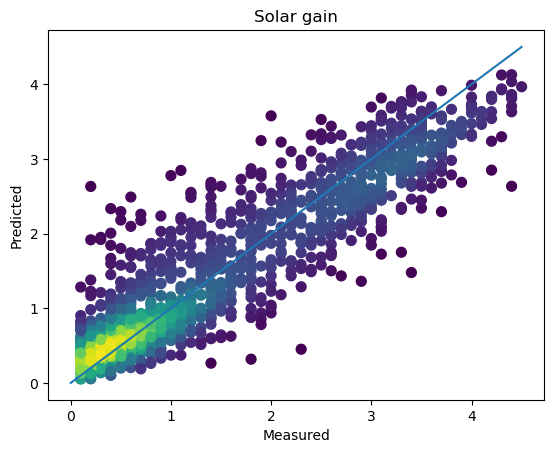

In [626]:
from scipy.stats import gaussian_kde
x=outcome_test
y=predictions.T
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
#idx = z.argsort()
#x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
ax.plot([0, 4.5], [0, 4.5])
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.title("Solar gain")
plt.show()

In [627]:
r2_score(outcome_test, predictions)

0.8263402503627901

tensorflow js & model export

feature selection (OK, consider learning rate etc) & subsample (not needed)

### check out training data

In [628]:
weather_agg_int.global_tilted_irradiance.min()

1.6

In [629]:
data_comb_last=data_comb.iloc[-240:]

In [630]:
variables_last=data_comb_last.drop(['value'], axis=1)
outcome_last=data_comb_last["value"].copy()

In [631]:
variables_last_sc=pd.DataFrame(scale.transform(variables_last),columns=variables_last.columns,index=variables_last.index)

In [632]:
predictions=model.predict((variables_last))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [633]:
predictions.min()

0.2379741

In [634]:
data_comb_last.value

13523    3.1
13524    1.6
13525    0.8
13526    1.9
13527    1.6
        ... 
13886    0.7
13887    0.6
13888    0.4
13889    0.2
13890    0.1
Name: value, Length: 240, dtype: float64

In [635]:
data_comb_last.index

Index([13523, 13524, 13525, 13526, 13527, 13528, 13529, 13530, 13531, 13539,
       ...
       13881, 13882, 13883, 13884, 13885, 13886, 13887, 13888, 13889, 13890],
      dtype='int64', length=240)

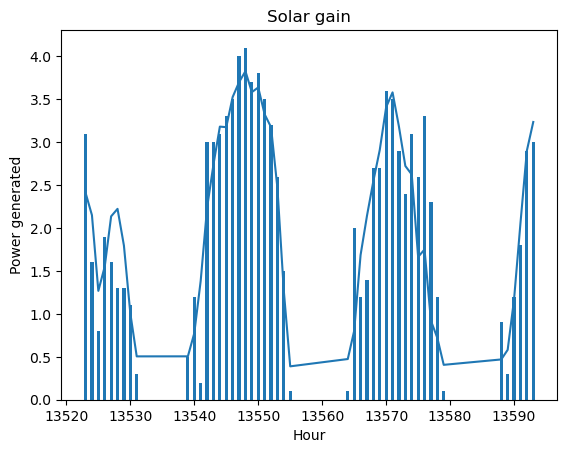

In [636]:
idx=range(0,48)
plt.bar(data_comb_last.iloc[idx].index.values,data_comb_last.iloc[idx].value.values, width=0.5)
#plt.xticks(range(0, np.size(df_fc.ForeCast.iloc[0:23].values), 1), rotation=90)
plt.plot(data_comb_last.iloc[idx].index.values, predictions[idx])
plt.xlabel("Hour")
plt.ylabel("Power generated")
plt.title("Solar gain")
plt.show()

## Forecast via API

### Final model

deploy model

In [637]:
from joblib import dump , load

## dump your model
#sol_pred_mod = dump(model, 'sol_pred_mod_NN.gz')
model.save("sol_pred_mod_NN.keras")
weather_scl = dump(scale, 'weather_scl_NN.gz')

In [638]:
weather_scl

['weather_scl_NN.gz']

Reload

In [639]:
import tensorflow as tf
model=tf.keras.models.load_model("sol_pred_mod_NN.keras")

In [640]:
# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open("sol_pred_mod_NN.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\GEBRUI~1\AppData\Local\Temp\tmpus2p9wr6\assets


INFO:tensorflow:Assets written to: C:\Users\GEBRUI~1\AppData\Local\Temp\tmpus2p9wr6\assets


Saved artifact at 'C:\Users\GEBRUI~1\AppData\Local\Temp\tmpus2p9wr6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='input_layer_9')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2290003441232: TensorSpec(shape=(1, 8), dtype=tf.float32, name=None)
  2290003438160: TensorSpec(shape=(1, 8), dtype=tf.float32, name=None)
  2290003443152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2290003442960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2290003440464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2290003435280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2290003441424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2290003440272: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [641]:
import sys
print(sys.version)

3.11.13 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:03:15) [MSC v.1929 64 bit (AMD64)]


In [642]:
print(tf.__version__)

2.18.1


In [643]:
import sklearn
print(sklearn.__version__)

1.5.2


In [644]:
import joblib
print(joblib.__version__)

1.4.2


### Weather forecast

In [645]:
parameters = {
    "latitude": 51.3225,
    "longitude": 4.9447,
    "tilt": 60,
    "azimuth": 77,
    "hourly": ['relative_humidity_2m', 'precipitation', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high' , 'soil_temperature_0cm', 'snow_depth', 'global_tilted_irradiance'],
}

In [646]:
parameters_2 = {
    "latitude": 51.3225,
    "longitude": 4.9447,
    "tilt": 60,
    "azimuth": -103,
    "hourly": ['global_tilted_irradiance','is_day'],
}

In [647]:
response = requests.get("https://api.open-meteo.com/v1/forecast",params=parameters)
weather_fc_int=pd.DataFrame(response.json()['hourly'])

In [648]:
weather_fc_int.head(24)

time  relative_humidity_2m  precipitation  cloud_cover_low  \
0   2025-08-31T00:00                    73            0.0              100   
1   2025-08-31T01:00                    79            0.0               99   
2   2025-08-31T02:00                    76            0.0               28   
3   2025-08-31T03:00                    88            0.4               10   
4   2025-08-31T04:00                    92            0.1              100   
5   2025-08-31T05:00                    93            0.3              100   
6   2025-08-31T06:00                    93            0.1              100   
7   2025-08-31T07:00                    94            0.7              100   
8   2025-08-31T08:00                    93            0.1              100   
9   2025-08-31T09:00                    87            0.0              100   
10  2025-08-31T10:00                    86            0.1              100   
11  2025-08-31T11:00                    76            0.0               37   
12  2025-08-31T12:00                    82            0.0              100   
13  2025-08-31T13:00                    73            0.0              100   
14  2025-08-31T14:00                    71            0.6              100   
15  2025-08-31T15:00                    84            0.1                4   
16  2025-08-31T16:00                    75            0.0                4   
17  2025-08-31T17:00                    72            0.0                0   
18  2025-08-31T18:00                    74            0.0              100   
19  2025-08-31T19:00                    77            0.0                1   
20  2025-08-31T20:00                    93            0.2              100   
21  2025-08-31T21:00                    93            0.2              100   
22  2025-08-31T22:00                    91            7.6              100   
23  2025-08-31T23:00                    87            0.0                3   

    cloud_cover_mid  cloud_cover_high  soil_temperature_0cm  snow_depth  \
0               100               100                  17.4         0.0   
1               100               100                  17.2         0.0   
2               100                77                  17.0         0.0   
3               100                99                  17.0         0.0   
4               100                 0                  16.8         0.0   
5               100                32                  16.6         0.0   
6               100                26                  17.0         0.0   
7               100                 7                  18.3         0.0   
8               100                 0                  20.1         0.0   
9                 0                 0                  21.8         0.0   
10                0                 1                  22.9         0.0   
11                0                 0                  23.8         0.0   
12               33                53                  24.2         0.0   
13              100                49                  23.9         0.0   
14              100                81                  23.0         0.0   
15                0                95                  22.1         0.0   
16                2               100                  21.4         0.0   
17                0                97                  20.6         0.0   
18              100               100                  19.9         0.0   
19               80               100                  19.0         0.0   
20              100               100                  18.2         0.0   
21              100               100                  17.5         0.0   
22              100               100                  17.2         0.0   
23               38               100                  17.1         0.0   

    global_tilted_irradiance  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  
5  

In [649]:
response_roof2 = requests.get("https://api.open-meteo.com/v1/forecast",params=parameters_2)
weather_fc_int_roof2=pd.DataFrame(response_roof2.json()['hourly'])

In [650]:
weather_fc_int_roof2.head(24)

time  global_tilted_irradiance  is_day
0   2025-08-31T00:00                       0.0       0
1   2025-08-31T01:00                       0.0       0
2   2025-08-31T02:00                       0.0       0
3   2025-08-31T03:00                       0.0       0
4   2025-08-31T04:00                       0.0       0
5   2025-08-31T05:00                       0.0       1
6   2025-08-31T06:00                       1.6       1
7   2025-08-31T07:00                       4.0       1
8   2025-08-31T08:00                      20.7       1
9   2025-08-31T09:00                     332.9       1
10  2025-08-31T10:00                      93.2       1
11  2025-08-31T11:00                     273.6       1
12  2025-08-31T12:00                     323.7       1
13  2025-08-31T13:00                     173.7       1
14  2025-08-31T14:00                      17.5       1
15  2025-08-31T15:00                      15.0       1
16  2025-08-31T16:00                     135.3       1
17  2025-08-31T17:00                      86.4       1
18  2025-08-31T18:00                      44.4       1
19  2025-08-31T19:00                       0.0       0
20  2025-08-31T20:00                       0.0       0
21  2025-08-31T21:00                       0.0       0
22  2025-08-31T22:00                       0.0       0
23  2025-08-31T23:00                       0.0       0

In [651]:
# merge
weather_fc_int.global_tilted_irradiance=weather_fc_int.global_tilted_irradiance+weather_fc_int_roof2.global_tilted_irradiance

In [652]:
weather_fc_int['is_day']=weather_fc_int.global_tilted_irradiance>0

In [653]:
test={"parameters":parameters}
print(test["parameters"])

{'latitude': 51.3225, 'longitude': 4.9447, 'tilt': 60, 'azimuth': 77, 'hourly': ['relative_humidity_2m', 'precipitation', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'soil_temperature_0cm', 'snow_depth', 'global_tilted_irradiance']}


In [654]:
weather_fc_int['time_']=weather_fc_int['time']
weather_fc_int['time'] = pd.to_datetime(weather_fc_int['time'])
weather_fc_int.time.dt.year

0      2025
1      2025
2      2025
3      2025
4      2025
       ... 
163    2025
164    2025
165    2025
166    2025
167    2025
Name: time, Length: 168, dtype: int32

In [655]:
def days_in_year(year=datetime.now().year):
    return 365 + calendar.isleap(year)
days_in_year(year=2024)

366

In [656]:
# date time and merge
weather_fc_int['time_']=weather_fc_int['time']
weather_fc_int['time'] = pd.to_datetime(weather_fc_int['time'])
weather_fc_int['time']=(weather_fc_int.time.dt.year-2024)*days_in_year(year=2024)*24+weather_fc_int.time.dt.day_of_year*24+weather_fc_int.time.dt.hour
weather_fc_int.set_index('time', inplace=True)

In [657]:
weather_fc_int.index

Index([14616, 14617, 14618, 14619, 14620, 14621, 14622, 14623, 14624, 14625,
       ...
       14774, 14775, 14776, 14777, 14778, 14779, 14780, 14781, 14782, 14783],
      dtype='int32', name='time', length=168)

In [658]:
weather_fc_int.columns

Index(['relative_humidity_2m', 'precipitation', 'cloud_cover_low',
       'cloud_cover_mid', 'cloud_cover_high', 'soil_temperature_0cm',
       'snow_depth', 'global_tilted_irradiance', 'is_day', 'time_'],
      dtype='object')

In [659]:
weather_fc_int.columns=['relative_humidity_2m', 'precipitation', 'cloud_cover_low',
       'cloud_cover_mid', 'cloud_cover_high', 'soil_temperature_0_to_7cm', 'snow_depth', 'global_tilted_irradiance',
       'is_day', 'time_']

In [660]:
weather_fc_int.columns

Index(['relative_humidity_2m', 'precipitation', 'cloud_cover_low',
       'cloud_cover_mid', 'cloud_cover_high', 'soil_temperature_0_to_7cm',
       'snow_depth', 'global_tilted_irradiance', 'is_day', 'time_'],
      dtype='object')

In [661]:
# make 2 versions at begin and end of interval
weather_fc_int_1=weather_fc_int.loc[weather_fc_int.index[:-1]]
weather_fc_int_2=weather_fc_int.loc[weather_fc_int.index[:-1]+1]
weather_fc_int_2.index=weather_fc_int.index[:-1]

In [662]:
# precipitation and irradiance is preceeding hour, others are instant --> average over interval
weather_fc_int=weather_fc_int_2
weather_fc_int.time_=weather_fc_int_1.time_
weather_fc_int.relative_humidity_2m=(weather_fc_int_1.relative_humidity_2m+weather_fc_int_2.relative_humidity_2m)/2
weather_fc_int.cloud_cover_high=(weather_fc_int_1.cloud_cover_high+weather_fc_int_2.cloud_cover_high)/2
weather_fc_int.cloud_cover_low=(weather_fc_int_1.cloud_cover_low+weather_fc_int_2.cloud_cover_low)/2
weather_fc_int.cloud_cover_mid=(weather_fc_int_1.cloud_cover_mid+weather_fc_int_2.cloud_cover_mid)/2
weather_fc_int.soil_temperature_0_to_7cm=(weather_fc_int_1.soil_temperature_0_to_7cm+weather_fc_int_2.soil_temperature_0_to_7cm)/2
weather_fc_int.snow_depth=(weather_fc_int_1.snow_depth+weather_fc_int_2.snow_depth)/2

In [663]:
weather_fc_int.snow_depth

time
14616    0.0
14617    0.0
14618    0.0
14619    0.0
14620    0.0
        ... 
14778    0.0
14779    0.0
14780    0.0
14781    0.0
14782    0.0
Name: snow_depth, Length: 167, dtype: float64

In [664]:
weather_fc_int.loc[weather_fc_int.snow_depth<0, 'snow_depth']=0
weather_fc_int.loc[np.isnan(weather_fc_int.snow_depth), 'snow_depth']=0

### Merge and prep

In [665]:
weather_fc_int.drop('time_', axis=1,inplace=True)

In [666]:
data_fc_comb=weather_fc_int

In [667]:
data_fc_comb.head(24)

relative_humidity_2m  precipitation  cloud_cover_low  cloud_cover_mid  \
time                                                                           
14616                  76.0            0.0             99.5            100.0   
14617                  77.5            0.0             63.5            100.0   
14618                  82.0            0.4             19.0            100.0   
14619                  90.0            0.1             55.0            100.0   
14620                  92.5            0.3            100.0            100.0   
14621                  93.0            0.1            100.0            100.0   
14622                  93.5            0.7            100.0            100.0   
14623                  93.5            0.1            100.0            100.0   
14624                  90.0            0.0            100.0             50.0   
14625                  86.5            0.1            100.0              0.0   
14626                  81.0            0.0             68.5              0.0   
14627                  79.0            0.0             68.5             16.5   
14628                  77.5            0.0            100.0             66.5   
14629                  72.0            0.6            100.0            100.0   
14630                  77.5            0.1             52.0             50.0   
14631                  79.5            0.0              4.0              1.0   
14632                  73.5            0.0              2.0              1.0   
14633                  73.0            0.0             50.0             50.0   
14634                  75.5            0.0             50.5             90.0   
14635                  85.0            0.2             50.5             90.0   
14636                  93.0            0.2            100.0            100.0   
14637                  92.0            7.6            100.0            100.0   
14638                  89.0            0.0             51.5             69.0   
14639                  89.5            0.0              1.5             33.0   

       cloud_cover_high  soil_temperature_0_to_7cm  snow_depth  \
time                                                             
14616             100.0                      17.30         0.0   
14617              88.5                      17.10         0.0   
14618              88.0                      17.00         0.0   
14619              49.5                      16.90         0.0   
14620              16.0                      16.70         0.0   
14621              29.0                      16.80         0.0   
14622              16.5                      17.65         0.0   
14623               3.5                      19.20         0.0   
14624               0.0                      20.95         0.0   
14625               0.5                      22.35         0.0   
14626               0.5                      23.35         0.0   
14627              26.5                      24.00         0.0   
14628              51.0                      24.05         0.0   
14629              65.0                      23.45         0.0   
14630              88.0                      22.55         0.0   
14631              97.5                      21.75         0.0   
14632              98.5                      21.00         0.0   
14633              98.5                      20.25         0.0   
14634             100.0                      19.45         0.0   
14635             100.0                      18.60         0.0   
14636             100.0                      17.85         0.0   
14637             100.0                      17.35         0.0   
14638             100.0                      17.15         0.0   
14639             100.0                      17.00         0.0   

       global_tilted_irradiance  is_day  
time                                     
14616                       0.0   False  
14617                       0.0   False  
14618                       0.0   False  

In [668]:
data_fc_comb = data_fc_comb.astype(float)

In [669]:
data_fc_comb.global_tilted_irradiance.head(24)

time
14616      0.0
14617      0.0
14618      0.0
14619      0.0
14620      0.0
14621      3.2
14622      8.0
14623     40.3
14624    491.8
14625    182.2
14626    513.5
14627    717.7
14628    370.6
14629     35.2
14630     30.4
14631    554.7
14632    290.6
14633    176.7
14634      0.0
14635      0.0
14636      0.0
14637      0.0
14638      0.0
14639      0.0
Name: global_tilted_irradiance, dtype: float64

In [670]:
data_fc_comb.global_tilted_irradiance.max()

866.6

In [541]:
data_fc_comb_sc=pd.DataFrame(scale.transform(data_fc_comb.drop(['is_day'], axis=1)),columns=data_fc_comb.drop(['is_day'], axis=1).columns,index=data_fc_comb.drop(['is_day'], axis=1).index)

### Predict

In [671]:
data_fc_comb[data_fc_comb.is_day>0]

relative_humidity_2m  precipitation  cloud_cover_low  cloud_cover_mid  \
time                                                                           
14621                  93.0            0.1            100.0            100.0   
14622                  93.5            0.7            100.0            100.0   
14623                  93.5            0.1            100.0            100.0   
14624                  90.0            0.0            100.0             50.0   
14625                  86.5            0.1            100.0              0.0   
...                     ...            ...              ...              ...   
14774                  45.0            0.0             19.0             16.0   
14775                  47.5            0.0             13.0             18.0   
14776                  50.5            0.0              7.0             20.0   
14777                  54.0            0.0              2.0             21.0   
14778                  58.0            0.0              0.0             20.0   

       cloud_cover_high  soil_temperature_0_to_7cm  snow_depth  \
time                                                             
14621              29.0                      16.80         0.0   
14622              16.5                      17.65         0.0   
14623               3.5                      19.20         0.0   
14624               0.0                      20.95         0.0   
14625               0.5                      22.35         0.0   
...                 ...                        ...         ...   
14774              75.5                      24.80         0.0   
14775              64.5                      23.30         0.0   
14776              53.0                      21.60         0.0   
14777              41.5                      19.85         0.0   
14778              31.0                      18.40         0.0   

       global_tilted_irradiance  is_day  
time                                     
14621                       3.2     1.0  
14622                       8.0     1.0  
14623                      40.3     1.0  
14624                     491.8     1.0  
14625                     182.2     1.0  
...                         ...     ...  
14774                     866.6     1.0  
14775                     782.6     1.0  
14776                     626.3     1.0  
14777                     343.3     1.0  
14778                      25.0     1.0  

[95 rows x 9 columns]

In [673]:
X_in = data_fc_comb[data_fc_comb.is_day>0].iloc[:, 0:8]
predictions=model.predict(X_in)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [513]:
predictions

array([[0.37172356],
       [0.6597135 ],
       [0.58489317],
       [1.4910079 ],
       [1.0090748 ],
       [1.6308726 ],
       [1.8703259 ],
       [1.5309174 ],
       [0.79202485],
       [0.305035  ],
       [0.50300246],
       [0.58528066],
       [0.30550796],
       [0.3160554 ],
       [0.39614642],
       [0.5166969 ],
       [1.5590235 ],
       [1.6854681 ],
       [2.7917502 ],
       [2.9636738 ],
       [2.7551184 ],
       [1.3257817 ],
       [3.3769972 ],
       [3.1149652 ],
       [2.3589747 ],
       [0.9183676 ],
       [0.19635749],
       [0.44538668],
       [0.77211285],
       [1.6517409 ],
       [2.669081  ],
       [2.49976   ],
       [2.6489823 ],
       [3.2292047 ],
       [2.9601161 ],
       [2.599685  ],
       [2.0429971 ],
       [1.5236064 ],
       [1.1134621 ],
       [0.57803047],
       [0.26999   ],
       [0.3858163 ],
       [0.5089066 ],
       [0.6658876 ],
       [0.81500006],
       [1.1711861 ],
       [1.3994802 ],
       [1.095

TFLite

In [674]:
#using tflite
interpreter = tf.lite.Interpreter(model_path="sol_pred_mod_NN.tflite")
interpreter.resize_tensor_input(input_details[0]['index'], X_in.shape)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

C:\Users\Gebruiker\anaconda3\envs\datascience2\Lib\site-packages\tensorflow\lite\python\interpreter.py:451: UserWarning:     Warning: Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [675]:
print(input_details)

[{'name': 'serving_default_input_layer_9:0', 'index': 0, 'shape': array([95,  8]), 'shape_signature': array([-1,  8]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [676]:
X_in.shape

(95, 8)

In [677]:
interpreter.set_tensor(input_details[0]['index'], X_in.astype(np.float32))
interpreter.invoke()

# Get output
predictions = interpreter.get_tensor(output_details[0]['index'])
print(predictions.shape)

(95, 1)


In [678]:
data_fc_comb.index

Index([14616, 14617, 14618, 14619, 14620, 14621, 14622, 14623, 14624, 14625,
       ...
       14773, 14774, 14775, 14776, 14777, 14778, 14779, 14780, 14781, 14782],
      dtype='int32', name='time', length=167)

In [679]:
df_fc=pd.DataFrame(0, columns=['Time','ForeCast'], index=data_fc_comb.index)

In [680]:
data_fc_comb.is_day

time
14616    0.0
14617    0.0
14618    0.0
14619    0.0
14620    0.0
        ... 
14778    1.0
14779    0.0
14780    0.0
14781    0.0
14782    0.0
Name: is_day, Length: 167, dtype: float64

In [681]:
df_fc['ForeCast'] = df_fc['ForeCast'].astype(float)
df_fc.loc[data_fc_comb.is_day>0, 'ForeCast']=predictions.flatten()

In [682]:
df_fc.Time=weather_fc_int_1.time_

In [683]:
df_fc.head(48)

Time  ForeCast
time                               
14616 2025-08-31 00:00:00  0.000000
14617 2025-08-31 01:00:00  0.000000
14618 2025-08-31 02:00:00  0.000000
14619 2025-08-31 03:00:00  0.000000
14620 2025-08-31 04:00:00  0.000000
14621 2025-08-31 05:00:00  0.472314
14622 2025-08-31 06:00:00  0.485869
14623 2025-08-31 07:00:00  0.601429
14624 2025-08-31 08:00:00  1.397486
14625 2025-08-31 09:00:00  0.895361
14626 2025-08-31 10:00:00  1.680059
14627 2025-08-31 11:00:00  2.279189
14628 2025-08-31 12:00:00  1.196530
14629 2025-08-31 13:00:00  0.765363
14630 2025-08-31 14:00:00  0.446764
14631 2025-08-31 15:00:00  1.695575
14632 2025-08-31 16:00:00  0.885118
14633 2025-08-31 17:00:00  0.702764
14634 2025-08-31 18:00:00  0.000000
14635 2025-08-31 19:00:00  0.000000
14636 2025-08-31 20:00:00  0.000000
14637 2025-08-31 21:00:00  0.000000
14638 2025-08-31 22:00:00  0.000000
14639 2025-08-31 23:00:00  0.000000
14640 2025-09-01 00:00:00  0.000000
14641 2025-09-01 01:00:00  0.000000
14642 2025-09-01 02:00:00  0.000000
14643 2025-09-01 03:00:00  0.000000
14644 2025-09-01 04:00:00  0.000000
14645 2025-09-01 05:00:00  0.536280
14646 2025-09-01 06:00:00  0.659720
14647 2025-09-01 07:00:00  0.635457
14648 2025-09-01 08:00:00  1.500208
14649 2025-09-01 09:00:00  2.358488
14650 2025-09-01 10:00:00  2.750701
14651 2025-09-01 11:00:00  2.905482
14652 2025-09-01 12:00:00  3.050576
14653 2025-09-01 13:00:00  1.644592
14654 2025-09-01 14:00:00  2.953004
14655 2025-09-01 15:00:00  3.120032
14656 2025-09-01 16:00:00  2.037988
14657 2025-09-01 17:00:00  0.774729
14658 2025-09-01 18:00:00  0.000000
14659 2025-09-01 19:00:00  0.000000
14660 2025-09-01 20:00:00  0.000000
14661 2025-09-01 21:00:00  0.000000
14662 2025-09-01 22:00:00  0.000000
14663 2025-09-01 23:00:00  0.000000

In [684]:
list(df_fc.Time.dt.strftime('%Y-%m-%dT%H:%M:%S%z+00:00').values)

['2025-08-31T00:00:00+00:00',
 '2025-08-31T01:00:00+00:00',
 '2025-08-31T02:00:00+00:00',
 '2025-08-31T03:00:00+00:00',
 '2025-08-31T04:00:00+00:00',
 '2025-08-31T05:00:00+00:00',
 '2025-08-31T06:00:00+00:00',
 '2025-08-31T07:00:00+00:00',
 '2025-08-31T08:00:00+00:00',
 '2025-08-31T09:00:00+00:00',
 '2025-08-31T10:00:00+00:00',
 '2025-08-31T11:00:00+00:00',
 '2025-08-31T12:00:00+00:00',
 '2025-08-31T13:00:00+00:00',
 '2025-08-31T14:00:00+00:00',
 '2025-08-31T15:00:00+00:00',
 '2025-08-31T16:00:00+00:00',
 '2025-08-31T17:00:00+00:00',
 '2025-08-31T18:00:00+00:00',
 '2025-08-31T19:00:00+00:00',
 '2025-08-31T20:00:00+00:00',
 '2025-08-31T21:00:00+00:00',
 '2025-08-31T22:00:00+00:00',
 '2025-08-31T23:00:00+00:00',
 '2025-09-01T00:00:00+00:00',
 '2025-09-01T01:00:00+00:00',
 '2025-09-01T02:00:00+00:00',
 '2025-09-01T03:00:00+00:00',
 '2025-09-01T04:00:00+00:00',
 '2025-09-01T05:00:00+00:00',
 '2025-09-01T06:00:00+00:00',
 '2025-09-01T07:00:00+00:00',
 '2025-09-01T08:00:00+00:00',
 '2025-09-

In [685]:
["2023-12-29T09:00:00+00:00", "2023-12-29T10:00:00+00:00", "2023-12-30T12:00:00+00:00"]

['2023-12-29T09:00:00+00:00',
 '2023-12-29T10:00:00+00:00',
 '2023-12-30T12:00:00+00:00']

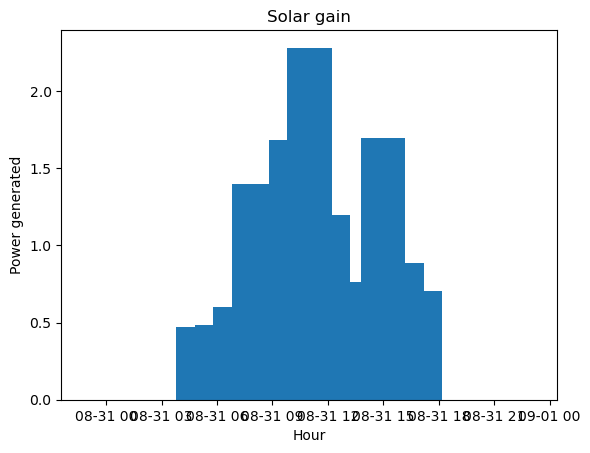

In [686]:
plt.bar(df_fc.Time.iloc[0:23].values,df_fc.ForeCast.iloc[0:23].values, width=0.1)
#plt.xticks(range(0, np.size(df_fc.ForeCast.iloc[0:23].values), 1), rotation=90)
plt.xlabel("Hour")
plt.ylabel("Power generated")
plt.title("Solar gain")
plt.show()

In [687]:
df_fc.Time.iloc[0:23].values

array(['2025-08-31T00:00:00.000000000', '2025-08-31T01:00:00.000000000',
       '2025-08-31T02:00:00.000000000', '2025-08-31T03:00:00.000000000',
       '2025-08-31T04:00:00.000000000', '2025-08-31T05:00:00.000000000',
       '2025-08-31T06:00:00.000000000', '2025-08-31T07:00:00.000000000',
       '2025-08-31T08:00:00.000000000', '2025-08-31T09:00:00.000000000',
       '2025-08-31T10:00:00.000000000', '2025-08-31T11:00:00.000000000',
       '2025-08-31T12:00:00.000000000', '2025-08-31T13:00:00.000000000',
       '2025-08-31T14:00:00.000000000', '2025-08-31T15:00:00.000000000',
       '2025-08-31T16:00:00.000000000', '2025-08-31T17:00:00.000000000',
       '2025-08-31T18:00:00.000000000', '2025-08-31T19:00:00.000000000',
       '2025-08-31T20:00:00.000000000', '2025-08-31T21:00:00.000000000',
       '2025-08-31T22:00:00.000000000'], dtype='datetime64[ns]')

In [688]:
df_fc.iloc[0:23]

Time  ForeCast
time                               
14616 2025-08-31 00:00:00  0.000000
14617 2025-08-31 01:00:00  0.000000
14618 2025-08-31 02:00:00  0.000000
14619 2025-08-31 03:00:00  0.000000
14620 2025-08-31 04:00:00  0.000000
14621 2025-08-31 05:00:00  0.472314
14622 2025-08-31 06:00:00  0.485869
14623 2025-08-31 07:00:00  0.601429
14624 2025-08-31 08:00:00  1.397486
14625 2025-08-31 09:00:00  0.895361
14626 2025-08-31 10:00:00  1.680059
14627 2025-08-31 11:00:00  2.279189
14628 2025-08-31 12:00:00  1.196530
14629 2025-08-31 13:00:00  0.765363
14630 2025-08-31 14:00:00  0.446764
14631 2025-08-31 15:00:00  1.695575
14632 2025-08-31 16:00:00  0.885118
14633 2025-08-31 17:00:00  0.702764
14634 2025-08-31 18:00:00  0.000000
14635 2025-08-31 19:00:00  0.000000
14636 2025-08-31 20:00:00  0.000000
14637 2025-08-31 21:00:00  0.000000
14638 2025-08-31 22:00:00  0.000000

In [965]:
sum(df_fc.ForeCast.iloc[0:23].values)

37.75547859072685

In [966]:
sum(df_fc.ForeCast.iloc[24:47].values)

36.92608815431595

In [551]:
sum(df_fc.ForeCast.iloc[48:71].values)

24.734165459871292

### AWS

In [1]:
import json

payload = {
    "body": {
        "features": [
                    [90.0, 0.0, 100.0, 50.0, 0.0, 20.95, 0.0, 491.8],
                    [86.5, 0.1, 100.0, 0.0, 0.5, 22.35, 0.0, 182.2]
                    ] 
    }
}

with open("input.json", "w", encoding="utf-8") as f:
    json.dump(payload, f)

In [19]:
import json
import numpy as np
import tensorflow as tf

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="sol_pred_mod_NN_test.tflite")

# Parse input
with open("input.json", "r", encoding="utf-8") as f:
    jayson = json.load(f)
    body=jayson['body']
features = np.array(body['features'], dtype=np.float32)

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.resize_tensor_input(input_details[0]['index'], features.shape)
interpreter.allocate_tensors()


# Run inference
interpreter.set_tensor(input_details[0]['index'], features)
interpreter.invoke()
predictions = interpreter.get_tensor(output_details[0]['index']).tolist()

In [20]:
predictions

[[1.3974114656448364], [0.8952987790107727]]

In [54]:
print("Expected input shape:", input_details[0]['shape'])

Expected input shape: [1 8]


In [56]:
features 

array([[ 90.  ,   0.  , 100.  ,  50.  ,   0.  ,  20.95,   0.  , 491.8 ],
       [ 90.  ,   0.  , 100.  ,  50.  ,   0.  ,  20.95,   0.  , 491.8 ]],
      dtype=float32)

In [68]:
import json

payload = {
    "body": json.dumps({
        "features": [
            [90.0, 0.0, 100.0, 50.0, 0.0, 20.95, 0.0, 491.8],
            [86.5, 0.1, 100.0, 0.0, 0.5, 22.35, 0.0, 182.2]
        ]
    })
}

with open("input.json", "w", encoding="utf-8") as f:
    json.dump(payload, f)

##### Call API on aws

In [32]:
import requests
import json

url = "https://ehklxvz47g.execute-api.eu-north-1.amazonaws.com/prod/predict"
headers = {
    "Content-Type": "application/json",
    "x-api-key": "my-home-automation-secret"
}

## Wrap features inside 'body' as JSON string
#payload = {
#    "body": json.dumps({
#        "features": [[90.0, 0.0, 100.0, 50.0, 0.0, 20.95, 0.0, 491.8]]
#    })
#}
payload = {
        "features": [
            [90.0, 0.0, 100.0, 50.0, 0.0, 20.95, 0.0, 491.8],
            [86.5, 0.1, 100.0, 0.0, 0.5, 22.35, 0.0, 182.2]
        ]
}

response = requests.post(url, json=payload, headers=headers)

try:
    print(response.json())
except Exception:
    print(response.text)

{'prediction': [[1.397374153137207], [0.8952677249908447]]}


In [5]:
payload

{'body': '{"features": [[90.0, 0.0, 100.0, 50.0, 0.0, 20.95, 0.0, 491.8]]}'}

In [4]:
response.json()

{'error': "'features'"}

##### adapted script

In [5]:
from datetime import datetime, timedelta
import requests
import pandas as pd
import numpy as np
import calendar
import pytz
from scipy import stats
from joblib import load
from datetime import datetime, timedelta

In [6]:
parameters = {
    "latitude": 51.3225,
    "longitude": 4.9447,
    "tilt": 60,
    "azimuth": 77,
    "hourly": ['relative_humidity_2m', 'precipitation', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high' , 'soil_temperature_0cm', 'snow_depth', 'global_tilted_irradiance'],
}
parameters_2 = {
           "latitude": 51.3225,
            "longitude": 4.9447,
            "tilt": 60,
            "azimuth": -103,
            "hourly": ['global_tilted_irradiance'],
        }              

In [7]:
response = requests.get("https://api.open-meteo.com/v1/forecast",params=parameters)
weather_fc_int=pd.DataFrame(response.json()['hourly'])

In [8]:
response_roof2 = requests.get("https://api.open-meteo.com/v1/forecast",params=parameters_2)
weather_fc_int_roof2=pd.DataFrame(response_roof2.json()['hourly'])

In [9]:
# merge
weather_fc_int.global_tilted_irradiance=weather_fc_int.global_tilted_irradiance+weather_fc_int_roof2.global_tilted_irradiance

In [10]:
weather_fc_int['is_day']=weather_fc_int.global_tilted_irradiance>0

In [11]:
weather_fc_int['time_']=weather_fc_int['time']
weather_fc_int['time'] = pd.to_datetime(weather_fc_int['time'])

In [13]:
def days_in_year(year=datetime.now().year):
    return 365 + calendar.isleap(year)
days_in_year(year=2024)
weather_fc_int['time']=(weather_fc_int.time.dt.year-2024)*days_in_year(year=2024)*24+weather_fc_int.time.dt.day_of_year*24+weather_fc_int.time.dt.hour
weather_fc_int.set_index('time', inplace=True)

In [14]:
weather_fc_int.columns=['relative_humidity_2m', 'precipitation', 'cloud_cover_low',
       'cloud_cover_mid', 'cloud_cover_high', 'soil_temperature_0_to_7cm', 'snow_depth', 'global_tilted_irradiance',
       'is_day', 'time_']

In [15]:
# make 2 versions at begin and end of interval
weather_fc_int_1=weather_fc_int.loc[weather_fc_int.index[:-1]]
weather_fc_int_2=weather_fc_int.loc[weather_fc_int.index[:-1]+1]
weather_fc_int_2.index=weather_fc_int.index[:-1]

In [16]:
# precipitation and irradiance is preceeding hour, others are instant --> average over interval
weather_fc_int=weather_fc_int_2
weather_fc_int.time_=weather_fc_int_1.time_
weather_fc_int.relative_humidity_2m=(weather_fc_int_1.relative_humidity_2m+weather_fc_int_2.relative_humidity_2m)/2
weather_fc_int.cloud_cover_high=(weather_fc_int_1.cloud_cover_high+weather_fc_int_2.cloud_cover_high)/2
weather_fc_int.cloud_cover_low=(weather_fc_int_1.cloud_cover_low+weather_fc_int_2.cloud_cover_low)/2
weather_fc_int.cloud_cover_mid=(weather_fc_int_1.cloud_cover_mid+weather_fc_int_2.cloud_cover_mid)/2
weather_fc_int.soil_temperature_0_to_7cm=(weather_fc_int_1.soil_temperature_0_to_7cm+weather_fc_int_2.soil_temperature_0_to_7cm)/2
weather_fc_int.snow_depth=(weather_fc_int_1.snow_depth+weather_fc_int_2.snow_depth)/2

In [17]:
weather_fc_int.loc[weather_fc_int.snow_depth<0, 'snow_depth']=0
weather_fc_int.loc[np.isnan(weather_fc_int.snow_depth), 'snow_depth']=0

In [18]:
weather_fc_int.drop('time_', axis=1,inplace=True)
data_fc_comb=weather_fc_int

In [19]:
data_fc_comb = data_fc_comb.astype(float)

In [37]:
X_in = data_fc_comb[data_fc_comb.is_day>0].iloc[:, 0:8].values.tolist()

In [38]:
X_in

[[74.5, 0.0, 60.5, 83.5, 100.0, 14.149999999999999, 0.0, 3.2],
 [73.5, 0.0, 42.5, 69.5, 100.0, 14.149999999999999, 0.0, 38.599999999999994],
 [67.0, 0.0, 50.0, 41.0, 100.0, 14.45, 0.0, 172.9],
 [69.5, 0.0, 50.0, 42.0, 100.0, 14.95, 0.0, 151.3],
 [73.5, 0.0, 50.0, 39.5, 100.0, 15.55, 0.0, 156.3],
 [71.5, 0.1, 100.0, 2.5, 100.0, 16.25, 0.0, 44.7],
 [74.5, 0.0, 80.0, 43.5, 100.0, 16.85, 0.0, 363.6],
 [80.0, 0.0, 80.0, 93.5, 100.0, 17.1, 0.0, 202.0],
 [78.0, 0.0, 50.5, 100.0, 100.0, 17.0, 0.0, 183.89999999999998],
 [68.5, 0.0, 1.5, 50.5, 100.0, 16.6, 0.0, 184.6],
 [60.5, 0.0, 6.0, 0.5, 99.5, 15.75, 0.0, 255.39999999999998],
 [57.5, 0.0, 5.0, 0.0, 99.5, 14.55, 0.0, 238.2],
 [58.5, 0.0, 20.5, 0.0, 100.0, 13.25, 0.0, 21.4],
 [87.0, 0.0, 0.0, 0.0, 0.0, 7.65, 0.0, 19.0],
 [86.0, 0.0, 0.0, 0.0, 0.0, 9.35, 0.0, 346.5],
 [78.5, 0.0, 3.0, 0.0, 0.0, 12.25, 0.0, 571.7],
 [69.5, 0.0, 53.0, 0.0, 0.0, 15.2, 0.0, 473.70000000000005],
 [63.5, 0.0, 99.5, 45.5, 0.0, 17.15, 0.0, 350.2],
 [59.5, 0.0, 62.0, 94

In [ ]:
import requests
import json

url = "yy"
headers = {
    "Content-Type": "application/json",
    "x-api-key": "xx"
}

## Wrap features inside 'body' as JSON string
#payload = {
#    "body": json.dumps({
#        "features": [[90.0, 0.0, 100.0, 50.0, 0.0, 20.95, 0.0, 491.8]]
#    })
#}
payload = {
        "features": X_in
}

response = requests.post(url, json=payload, headers=headers)

try:    
    resp=response.json()
    predictions=resp['prediction']
except Exception:
    print(response.text)

In [52]:
df_fc=pd.DataFrame(0, columns=['Time','ForeCast'], index=data_fc_comb.index)
df_fc['ForeCast'] = df_fc['ForeCast'].astype(float)
df_fc.loc[data_fc_comb.is_day>0, 'ForeCast']=predictions
df_fc.Time=weather_fc_int_1.time_

### retrain model

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
print(tf.__version__)

2.18.1


In [60]:
# load model
model=tf.keras.models.load_model("sol_pred_mod_NN.keras")

In [3]:
# dummy data frame
df_new = pd.DataFrame({             
            "hour": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
            "actual_kwh": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.6, 1.2, 1.7, 1.5, 0.9, 0.9, 0.7, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            "forecast_kwh": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.6, 0.6, 0.7, 0.8, 0.9, 0.9, 1.1, 0.6, 0.6, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0],
        })

In [4]:
df_new

hour  actual_kwh  forecast_kwh
0      2         0.0           0.0
1      3         0.0           0.0
2      4         0.0           0.0
3      5         0.0           0.0
4      6         0.0           0.0
5      7         0.0           0.0
6      8         0.1           0.3
7      9         0.2           0.6
8     10         0.6           0.6
9     11         1.2           0.7
10    12         1.7           0.8
11    13         1.5           0.9
12    14         0.9           0.9
13    15         0.9           1.1
14    16         0.7           0.6
15    17         0.2           0.6
16    18         0.0           0.3
17    19         0.0           0.0
18    20         0.0           0.0
19    21         0.0           0.0
20    22         0.0           0.0
21    23         0.0           0.0

In [39]:
# load
df_new = pd.read_csv("my_data.csv")  # or "/config/my_data.csv" for persistent files
print(df_new.head())

   hour  actual_kwh  forecast_kwh                  timestamp
0     1         0.0        0.0001  2025-11-01 00:00:00+00:00
1     2         0.0        0.0001  2025-11-01 01:00:00+00:00
2     3         0.0        0.0001  2025-11-01 02:00:00+00:00
3     4         0.0        0.0001  2025-11-01 03:00:00+00:00
4     5         0.0        0.0001  2025-11-01 04:00:00+00:00


In [7]:
df_new

hour  actual_kwh  forecast_kwh                  timestamp
0      1         0.0        0.0001  2025-11-01 00:00:00+00:00
1      2         0.0        0.0001  2025-11-01 01:00:00+00:00
2      3         0.0        0.0001  2025-11-01 02:00:00+00:00
3      4         0.0        0.0001  2025-11-01 03:00:00+00:00
4      5         0.0        0.0001  2025-11-01 04:00:00+00:00
5      6         0.0        0.0001  2025-11-01 05:00:00+00:00
6      7         0.0        0.3001  2025-11-01 06:00:00+00:00
7      8         0.0        0.5001  2025-11-01 07:00:00+00:00
8      9         0.1        0.3001  2025-11-01 08:00:00+00:00
9     10         0.2        0.4001  2025-11-01 09:00:00+00:00
10    11         0.2        0.4001  2025-11-01 10:00:00+00:00
11    12         0.5        0.4001  2025-11-01 11:00:00+00:00
12    13         0.3        0.4001  2025-11-01 12:00:00+00:00
13    14         0.3        0.4001  2025-11-01 13:00:00+00:00
14    15         0.5        0.4001  2025-11-01 14:00:00+00:00
15    16         0.4        0.3001  2025-11-01 15:00:00+00:00
16    17         0.0        0.0001  2025-11-01 16:00:00+00:00
17    18         0.0        0.0001  2025-11-01 17:00:00+00:00
18    19         0.0        0.0001  2025-11-01 18:00:00+00:00
19    20         0.0        0.0001  2025-11-01 19:00:00+00:00
20    21         0.0        0.0001  2025-11-01 20:00:00+00:00
21    22         0.0        0.0001  2025-11-01 21:00:00+00:00
22    23         0.0        0.0001  2025-11-01 22:00:00+00:00

In [8]:
# weather forecast
from datetime import datetime, timedelta
import requests
import pandas as pd
import numpy as np
import calendar
import pytz
from scipy import stats
from joblib import load
from datetime import datetime, timedelta

parameters = {
    "latitude": 51.3225,
    "longitude": 4.9447,
    "tilt": 60,
    "azimuth": 77,
    "hourly": ['relative_humidity_2m', 'precipitation', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high' , 'soil_temperature_0cm', 'snow_depth', 'global_tilted_irradiance'],
}
parameters_2 = {
           "latitude": 51.3225,
            "longitude": 4.9447,
            "tilt": 60,
            "azimuth": -103,
            "hourly": ['global_tilted_irradiance'],
        }    

response = requests.get("https://api.open-meteo.com/v1/forecast",params=parameters)
weather_fc_int=pd.DataFrame(response.json()['hourly'])

response_roof2 = requests.get("https://api.open-meteo.com/v1/forecast",params=parameters_2)
weather_fc_int_roof2=pd.DataFrame(response_roof2.json()['hourly'])

weather_fc_int.global_tilted_irradiance=weather_fc_int.global_tilted_irradiance+weather_fc_int_roof2.global_tilted_irradiance

weather_fc_int['is_day']=weather_fc_int.global_tilted_irradiance>0

weather_fc_int['time_']=weather_fc_int['time']
weather_fc_int['time'] = pd.to_datetime(weather_fc_int['time'])

weather_fc_int['checktime']=weather_fc_int['time']

def days_in_year(year=datetime.now().year):
    return 365 + calendar.isleap(year)
days_in_year(year=2024)
weather_fc_int['time']=(weather_fc_int.time.dt.year-2024)*days_in_year(year=2024)*24+weather_fc_int.time.dt.day_of_year*24+weather_fc_int.time.dt.hour
weather_fc_int.set_index('time', inplace=True)

weather_fc_int.columns=['relative_humidity_2m', 'precipitation', 'cloud_cover_low',
       'cloud_cover_mid', 'cloud_cover_high', 'soil_temperature_0_to_7cm', 'snow_depth', 'global_tilted_irradiance',
       'is_day', 'time_', 'checktime']
# make 2 versions at begin and end of interval
weather_fc_int_1=weather_fc_int.loc[weather_fc_int.index[:-1]]
weather_fc_int_2=weather_fc_int.loc[weather_fc_int.index[:-1]+1]
weather_fc_int_2.index=weather_fc_int.index[:-1]

# precipitation and irradiance is preceeding hour, others are instant --> average over interval
weather_fc_int=weather_fc_int_2
weather_fc_int.time_=weather_fc_int_1.time_
weather_fc_int.relative_humidity_2m=(weather_fc_int_1.relative_humidity_2m+weather_fc_int_2.relative_humidity_2m)/2
weather_fc_int.cloud_cover_high=(weather_fc_int_1.cloud_cover_high+weather_fc_int_2.cloud_cover_high)/2
weather_fc_int.cloud_cover_low=(weather_fc_int_1.cloud_cover_low+weather_fc_int_2.cloud_cover_low)/2
weather_fc_int.cloud_cover_mid=(weather_fc_int_1.cloud_cover_mid+weather_fc_int_2.cloud_cover_mid)/2
weather_fc_int.soil_temperature_0_to_7cm=(weather_fc_int_1.soil_temperature_0_to_7cm+weather_fc_int_2.soil_temperature_0_to_7cm)/2
weather_fc_int.snow_depth=(weather_fc_int_1.snow_depth+weather_fc_int_2.snow_depth)/2

weather_fc_int.loc[weather_fc_int.snow_depth<0, 'snow_depth']=0
weather_fc_int.loc[np.isnan(weather_fc_int.snow_depth), 'snow_depth']=0

weather_fc_int.drop('time_', axis=1,inplace=True)
data_fc_comb=weather_fc_int

#data_fc_comb = data_fc_comb.astype(float)

In [9]:
data_fc_comb

relative_humidity_2m  precipitation  cloud_cover_low  cloud_cover_mid  \
time                                                                           
16104                  89.0            0.0              0.0              0.0   
16105                  89.5            0.0              0.0              0.0   
16106                  90.5            0.0              0.0              0.0   
16107                  90.5            0.0              0.0             45.5   
16108                  91.5            0.0              0.0             95.5   
...                     ...            ...              ...              ...   
16266                  82.5            0.0              6.0              5.5   
16267                  83.0            0.0             21.0             20.0   
16268                  82.5            0.0             40.5             39.0   
16269                  82.0            0.0             61.5             58.5   
16270                  82.0            0.0             80.5             75.0   

       cloud_cover_high  soil_temperature_0_to_7cm  snow_depth  \
time                                                             
16104               0.0                      10.75         0.0   
16105              50.0                      10.55         0.0   
16106             100.0                      10.65         0.0   
16107             100.0                      10.85         0.0   
16108             100.0                      11.30         0.0   
...                 ...                        ...         ...   
16266              90.0                       9.50         0.0   
16267              95.0                       9.40         0.0   
16268              98.5                       9.50         0.0   
16269             100.0                       9.70         0.0   
16270             100.0                       9.95         0.0   

       global_tilted_irradiance  is_day           checktime  
time                                                         
16104                       0.0   False 2025-11-01 01:00:00  
16105                       0.0   False 2025-11-01 02:00:00  
16106                       0.0   False 2025-11-01 03:00:00  
16107                       0.0   False 2025-11-01 04:00:00  
16108                       0.0   False 2025-11-01 05:00:00  
...                         ...     ...                 ...  
16266                       0.0   False 2025-11-07 19:00:00  
16267                       0.0   False 2025-11-07 20:00:00  
16268                       0.0   False 2025-11-07 21:00:00  
16269                       0.0   False 2025-11-07 22:00:00  
16270                       0.0   False 2025-11-07 23:00:00  

[167 rows x 10 columns]

In [19]:
df_new.timestamp=pd.to_datetime(df_new["timestamp"])

In [52]:
df_new['time']=(df_new.timestamp.dt.year-2024)*days_in_year(year=2024)*24+df_new.timestamp.dt.day_of_year*24+df_new.timestamp.dt.hour
df_new.set_index('time', inplace=True)

In [24]:
data_fc_comb.loc[df_new['time']].global_tilted_irradiance

time
16104      0.0
16105      0.0
16106      0.0
16107      0.0
16108      0.0
16109      0.0
16110      1.6
16111      3.2
16112      6.4
16113      8.0
16114     14.4
16115     17.5
16116     27.2
16117     93.5
16118    118.8
16119     37.5
16120      0.0
16121      0.0
16122      0.0
16123      0.0
16124      0.0
16125      0.0
16126      0.0
Name: global_tilted_irradiance, dtype: float64

In [27]:
df_new.forecast_kwh

0     0.0001
1     0.0001
2     0.0001
3     0.0001
4     0.0001
5     0.0001
6     0.3001
7     0.5001
8     0.3001
9     0.4001
10    0.4001
11    0.4001
12    0.4001
13    0.4001
14    0.4001
15    0.3001
16    0.0001
17    0.0001
18    0.0001
19    0.0001
20    0.0001
21    0.0001
22    0.0001
Name: forecast_kwh, dtype: float64

In [57]:
# split data
is_day = data_fc_comb.loc[df_new.index].is_day
X_train = data_fc_comb.loc[df_new.index].iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
X_train = X_train[is_day]
y_train = df_new.loc[X_train.index].actual_kwh
X_train

relative_humidity_2m  precipitation  cloud_cover_low  cloud_cover_mid  \
time                                                                           
16110                  89.0            0.3             50.0             95.5   
16111                  91.5            1.9            100.0            100.0   
16112                  95.0            1.1            100.0            100.0   
16113                  94.5            1.4            100.0            100.0   
16114                  91.0            1.2            100.0            100.0   
16115                  90.0            1.3             94.5            100.0   
16116                  90.5            1.7             59.0            100.0   
16117                  91.0            0.2             16.5            100.0   
16118                  91.5            0.1             52.0             53.5   
16119                  89.5            0.0            100.0              3.5   

       cloud_cover_high  soil_temperature_0_to_7cm  snow_depth  \
time                                                             
16110             100.0                      12.60         0.0   
16111             100.0                      12.95         0.0   
16112             100.0                      12.90         0.0   
16113             100.0                      12.90         0.0   
16114              99.5                      13.25         0.0   
16115              99.5                      12.95         0.0   
16116             100.0                      12.25         0.0   
16117             100.0                      11.90         0.0   
16118              77.5                      11.55         0.0   
16119              27.5                      11.30         0.0   

       global_tilted_irradiance  
time                             
16110                       1.6  
16111                       3.2  
16112                       6.4  
16113                       8.0  
16114                      14.4  
16115                      17.5  
16116                      27.2  
16117                      93.5  
16118                     118.8  
16119                      37.5

In [58]:
y_train

time
16110    0.0
16111    0.0
16112    0.1
16113    0.2
16114    0.2
16115    0.5
16116    0.3
16117    0.3
16118    0.5
16119    0.4
Name: actual_kwh, dtype: float64

In [61]:
# retrain
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-5))
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=2, restore_best_weights=True
)
model.fit(X_train, y_train, validation_split=0.2, epochs=10, callbacks=[callback])

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 0.0647 - val_loss: 0.0199
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0646 - val_loss: 0.0199
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0646 - val_loss: 0.0199


In [35]:
# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open("sol_pred_mod_NN_new.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\GEBRUI~1\AppData\Local\Temp\tmpeu2afxj8\assets


INFO:tensorflow:Assets written to: C:\Users\GEBRUI~1\AppData\Local\Temp\tmpeu2afxj8\assets


Saved artifact at 'C:\Users\GEBRUI~1\AppData\Local\Temp\tmpeu2afxj8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='input_layer_9')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1277971808080: TensorSpec(shape=(1, 8), dtype=tf.float32, name=None)
  1277971807888: TensorSpec(shape=(1, 8), dtype=tf.float32, name=None)
  1277971807504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1277971806928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1277980541584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1277980542736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1277980541392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1277980543696: TensorSpec(shape=(), dtype=tf.resource, name=None)


##### Invoke API

In [ ]:
import requests
import json

url = "yy"
headers = {
    "Content-Type": "application/json",
    "x-api-key": "xx"
}

## Wrap features inside 'body' as JSON string
#payload = {
#    "body": json.dumps({
#        "features": [[90.0, 0.0, 100.0, 50.0, 0.0, 20.95, 0.0, 491.8]]
#    })
#}
payload = {
        "features": [
            [89.0,0.3,50.0,95.5,100.0,12.60,0.0,1.6],
            [91.5,1.9,100.0,100.0,100.0,12.95,0.0,3.2],
            [95.0,1.1,100.0,100.0,100.0,12.90,0.0,6.4],
            [94.5,1.4,100.0,100.0,100.0,12.90,0.0,8.0],
            [91.0,1.2,100.0,100.0,99.5,13.25,0.0,14.4],
            [90.0,1.3,94.5,100.0,99.5,12.95,0.0,17.5],
            [90.5,1.7,59.0,100.0,100.0,12.25,0.0,27.2],
            [91.0,0.2,16.5,100.0,100.0,11.90,0.0,93.5],
            [91.5,0.1,52.0,53.5,77.5,11.55,0.0,118.8],
            [89.5,0.0,100.0,3.5,27.5,11.30,0.0,37.5]
        ],
     "targets": [0.0,0.0,0.1,0.2,0.2,0.5,0.3,0.3,0.5,0.4]
}

response = requests.post(url, json=payload, headers=headers)

try:
    print(response.json())
except Exception:
    print(response.text)

{'status': 'success', 'updated_rows': 10}


##### prepare scripting in Appdaemon

In [34]:
# weather forecast
from datetime import datetime, timedelta
import requests
import pandas as pd
import numpy as np
import calendar
import pytz
from scipy import stats
from joblib import load
from datetime import datetime, timedelta

parameters = {
    "latitude": 51.3225,
    "longitude": 4.9447,
    "tilt": 60,
    "azimuth": 77,
    "hourly": ['relative_humidity_2m', 'precipitation', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high' , 'soil_temperature_0cm', 'snow_depth', 'global_tilted_irradiance'],
}
parameters_2 = {
           "latitude": 51.3225,
            "longitude": 4.9447,
            "tilt": 60,
            "azimuth": -103,
            "hourly": ['global_tilted_irradiance'],
        }    

response = requests.get("https://api.open-meteo.com/v1/forecast",params=parameters)
weather_fc_int=pd.DataFrame(response.json()['hourly'])

response_roof2 = requests.get("https://api.open-meteo.com/v1/forecast",params=parameters_2)
weather_fc_int_roof2=pd.DataFrame(response_roof2.json()['hourly'])

weather_fc_int.global_tilted_irradiance=weather_fc_int.global_tilted_irradiance+weather_fc_int_roof2.global_tilted_irradiance

weather_fc_int['is_day']=weather_fc_int.global_tilted_irradiance>0

weather_fc_int['time_']=weather_fc_int['time']
weather_fc_int['time'] = pd.to_datetime(weather_fc_int['time'])

weather_fc_int['checktime']=weather_fc_int['time']

def days_in_year(year=datetime.now().year):
    return 365 + calendar.isleap(year)
days_in_year(year=2024)
weather_fc_int['time']=(weather_fc_int.time.dt.year-2024)*days_in_year(year=2024)*24+weather_fc_int.time.dt.day_of_year*24+weather_fc_int.time.dt.hour
weather_fc_int.set_index('time', inplace=True)

weather_fc_int.columns=['relative_humidity_2m', 'precipitation', 'cloud_cover_low',
       'cloud_cover_mid', 'cloud_cover_high', 'soil_temperature_0_to_7cm', 'snow_depth', 'global_tilted_irradiance',
       'is_day', 'time_', 'checktime']
# make 2 versions at begin and end of interval
weather_fc_int_1=weather_fc_int.loc[weather_fc_int.index[:-1]]
weather_fc_int_2=weather_fc_int.loc[weather_fc_int.index[:-1]+1]
weather_fc_int_2.index=weather_fc_int.index[:-1]

# precipitation and irradiance is preceeding hour, others are instant --> average over interval
weather_fc_int=weather_fc_int_2
weather_fc_int.time_=weather_fc_int_1.time_
weather_fc_int.relative_humidity_2m=(weather_fc_int_1.relative_humidity_2m+weather_fc_int_2.relative_humidity_2m)/2
weather_fc_int.cloud_cover_high=(weather_fc_int_1.cloud_cover_high+weather_fc_int_2.cloud_cover_high)/2
weather_fc_int.cloud_cover_low=(weather_fc_int_1.cloud_cover_low+weather_fc_int_2.cloud_cover_low)/2
weather_fc_int.cloud_cover_mid=(weather_fc_int_1.cloud_cover_mid+weather_fc_int_2.cloud_cover_mid)/2
weather_fc_int.soil_temperature_0_to_7cm=(weather_fc_int_1.soil_temperature_0_to_7cm+weather_fc_int_2.soil_temperature_0_to_7cm)/2
weather_fc_int.snow_depth=(weather_fc_int_1.snow_depth+weather_fc_int_2.snow_depth)/2

weather_fc_int.loc[weather_fc_int.snow_depth<0, 'snow_depth']=0
weather_fc_int.loc[np.isnan(weather_fc_int.snow_depth), 'snow_depth']=0

weather_fc_int.drop('time_', axis=1,inplace=True)
data_fc_comb=weather_fc_int

In [ ]:
df_new.timestamp=pd.to_datetime(df_new["timestamp"])
df_new['time']=(df_new.timestamp.dt.year-2024)*days_in_year(year=2024)*24+df_new.timestamp.dt.day_of_year*24+df_new.timestamp.dt.hour
df_new.set_index('time', inplace=True)

In [36]:
# split data
is_day = data_fc_comb.loc[df_new.index].is_day
X_train = data_fc_comb.loc[df_new.index].iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
X_train = X_train[is_day].values.tolist()
X_train

NameError: name 'df_new' is not defined

In [38]:
# ----------------- don't copy --------------------------
# split data
is_day = data_fc_comb.is_day
X_train = data_fc_comb.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
X_train = X_train[is_day].values.tolist()
X_train

[[74.5, 0.0, 100.0, 0.0, 0.0, 1.4, 0.0, 8.0],
 [75.5, 0.0, 100.0, 0.0, 5.0, 1.9000000000000001, 0.0, 142.3],
 [74.5, 0.0, 100.0, 1.5, 55.0, 2.6, 0.0, 108.30000000000001],
 [73.5, 0.0, 100.0, 33.5, 100.0, 2.95, 0.0, 68.1],
 [78.0, 0.1, 100.0, 82.0, 61.0, 3.5, 0.005, 44.6],
 [85.0, 0.5, 100.0, 100.0, 35.0, 3.0999999999999996, 0.01, 28.9],
 [88.5, 0.7, 100.0, 100.0, 24.0, 2.5, 0.005, 12.8],
 [89.5, 0.1, 100.0, 100.0, 48.5, 2.9, 0.0, 8.0],
 [95.0, 0.0, 77.0, 100.0, 98.0, 3.2, 0.0, 14.4],
 [94.5, 0.0, 76.5, 100.0, 100.0, 4.2, 0.0, 51.0],
 [94.5, 0.0, 99.5, 100.0, 50.0, 5.050000000000001, 0.0, 60.7],
 [93.0, 0.0, 100.0, 50.0, 0.5, 5.5, 0.0, 97.3],
 [91.0, 0.0, 100.0, 0.0, 8.0, 5.85, 0.0, 114.80000000000001],
 [89.0, 0.0, 93.5, 0.0, 35.0, 6.15, 0.0, 125.9],
 [87.5, 0.0, 93.5, 0.5, 77.5, 6.4, 0.0, 147.10000000000002],
 [87.0, 0.0, 100.0, 13.0, 98.0, 6.3, 0.0, 37.0],
 [88.0, 0.0, 100.0, 57.0, 97.5, 5.65, 0.0, 4.8],
 [95.5, 0.0, 50.5, 53.5, 3.0, 2.65, 0.0, 28.0],
 [93.5, 0.0, 50.0, 16.5, 39.5, 2

In [ ]:
y_train = df_new.loc[X_train.index].actual_kwh.tolist()

In [41]:
# ----------------- don't copy --------------------------
y_train = df_new.actual_kwh.values.tolist()
y_train

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1999999999999999,
 0.2,
 0.5,
 0.3,
 0.3,
 0.5,
 0.3999999999999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
key="xx"
url="yy"

In [ ]:
headers = {
            "Content-Type": "application/json",
            "x-api-key": key
        }       
        payload = {
            "features": X_train
            "targets": y_train
        }
response = requests.post(url, json=payload, headers=headers)
try:
    print(response.json())
except Exception:
    print(response.text)